**Analyzing the FIFA 2019 Data**

<img src="https://cdn.vox-cdn.com/thumbor/2Ry6ngjJTXC0iMCBIahjCwW1Lq0=/0x0:1920x1080/1200x800/filters:focal(1024x315:1330x621)/cdn.vox-cdn.com/uploads/chorus_image/image/62871810/082251.0.jpg" width="900px">

**Importing the Basic Libraries**

In [3]:
# basic operations
import numpy as np
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')




**Reading the Data**

In [4]:
# reading the data and also checking the computation time

%time data = pd.read_csv('Footballer.csv')

print(data.shape)

CPU times: total: 391 ms
Wall time: 422 ms
(18207, 89)


**Analyzing the Data**

In [6]:
# checking the first 5 rows and columns

data.head(5)

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [7]:
# checking if the data contains any NULL value

data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [ ]:
# decsribing the data

data.describe()

In [9]:
# taking out the information from the given data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

**Data Cleaning**

In [ ]:
# filling the missing value for the continous variables for proper data visualization

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)


In [20]:
data.fillna(0, inplace = True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 97 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      18207 non-null  object 
 10  Club_Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [21]:
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [22]:
# renaming a column
data.rename(columns={'Club Logo':'Club_Logo'}, inplace=True)

# adding these categories to the data

data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)


In [23]:
players = data[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]

players.head()

Name  Defending  General  Mental  Passing  Mobility  Power  \
0           L. Messi         29       89      71       87        91     74   
1  Cristiano Ronaldo         27       88      73       81        91     83   
2          Neymar Jr         28       85      72       80        94     69   
3             De Gea         16       26      43       39        66     54   
4       K. De Bruyne         59       79      81       92        81     76   
5          E. Hazard         28       83      72       84        92     75   
6          L. Modrić         70       81      80       89        84     77   
7          L. Suárez         48       85      78       74        84     81   
8       Sergio Ramos         90       78      77       74        78     82   
9           J. Oblak         19       14      41       23        64     61   

   Rating  Shooting                                 Flag  Age Nationality  \
0      94        88  https://cdn.sofifa.org/flags/52.png   31   Argentina   
1      94        88  https://cdn.sofifa.org/flags/38.png   33    Portugal   
2      92        84  https://cdn.sofifa.org/flags/54.png   26      Brazil   
3      92        21  https://cdn.sofifa.org/flags/45.png   27       Spain   
4      92        85   https://cdn.sofifa.org/flags/7.png   27     Belgium   
5      91        82   https://cdn.sofifa.org/flags/7.png   27     Belgium   
6      91        78  https://cdn.sofifa.org/flags/10.png   32     Croatia   
7      91        87  https://cdn.sofifa.org/flags/60.png   31     Uruguay   
8      91        68  https://cdn.sofifa.org/flags/45.png   32       Spain   
9      92        14  https://cdn.sofifa.org/flags/44.png   25    Slovenia   

                                            Photo  \
0  https://cdn.sofifa.org/players/4/19/158023.png   
1   https://cdn.sofifa.org/players/4/19/20801.png   
2  https://cdn.sofifa.org/players/4/19/190871.png   
3  https://cdn.sofifa.org/players/4/19/193080.png   
4  https://cdn.sofifa.org/players/4/19/192985.png   
5  https://cdn.sofifa.org/players/4/19/183277.png   
6  https://cdn.sofifa.org/players/4/19/177003.png   
7  https://cdn.sofifa.org/players/4/19/176580.png   
8  https://cdn.sofifa.org/players/4/19/155862.png   
9  https://cdn.sofifa.org/players/4/19/200389.png   

                                      Club_Logo                 Club  
0  https://cdn.sofifa.org/teams/2/light/241.png         FC Barcelona  
1   https://cdn.sofifa.org/teams/2/light/45.png             Juventus  
2   https://cdn.sofifa.org/teams/2/light/73.png  Paris Saint-Germain  
3   https://cdn.sofifa.org/teams/2/light/11.png    Manchester United  
4   https://cdn.sofifa.org/teams/2/light/10.png      Manchester City  
5    https://cdn.sofifa.org/teams/2/light/5.png              Chelsea  
6  https://cdn.sofifa.org/teams/2/light/243.png          Real Madrid  
7  https://cdn.sofifa.org/teams/2/light/241.png         FC Barcelona  
8  https://cdn.sofifa.org/teams/2/light/243.png          Real Madrid  
9  https://cdn.sofifa.org/teams/2/light/240.png      Atlético Madrid

In [24]:
import requests
import random
from math import pi

import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)

def details(row, title, image, age, nationality, photo, logo, club):
    
    flag_image = "img_flag.jpg"
    player_image = "img_player.jpg"
    logo_image = "img_club_logo.jpg"
        
    img_flag = requests.get(image).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)
    
    player_img = requests.get(photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
     
    logo_img = requests.get(logo).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)
        
    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
    if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
    
    basic_color = '#37474f'
    color_annotate = '#01579b'
    
    img = mpimg.imread(flag_image)
    
    plt.figure(figsize=(15,8))
    categories=list(players)[1:]
    coulumnDontUseGraph = ['Flag', 'Age', 'Nationality', 'Photo', 'Logo', 'Club']
    N = len(categories) - len(coulumnDontUseGraph)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
    
    values = players.loc[row].drop('Name').values.flatten().tolist() 
    valuesDontUseGraph = [image, age, nationality, photo, logo, club]
    values = [e for e in values if e not in (valuesDontUseGraph)]
    values += values[:1]
    
    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= colorRandom, alpha=0.5)
    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')
    
    ax.annotate('Nationality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
                      
    ax.annotate('Age: ' + str(age), xy=(10,10), xytext=(43, 180),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    arr_img_player = plt.imread(player_image, format='jpg')

    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )
    arr_img_logo = plt.imread(logo_image, format='jpg')

    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-320, -226),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)

    plt.title(title, size=50, color= basic_color)

In [29]:
# defining a polar graph

def graphPolar(id = 0):
    if 0 <= id < len(data.ID):
        details(row = players.index[id], 
                title = players['Name'][id], 
                age = players['Age'][id], 
                photo = players['Photo'][id],
                nationality = players['Nationality'][id],
                image = players['Flag'][id], 
                logo = players['Club_Logo'][id], 
                club = players['Club'][id])
    else:
        print('The base has 17917 players. You can put positive numbers from 0 to 17917')

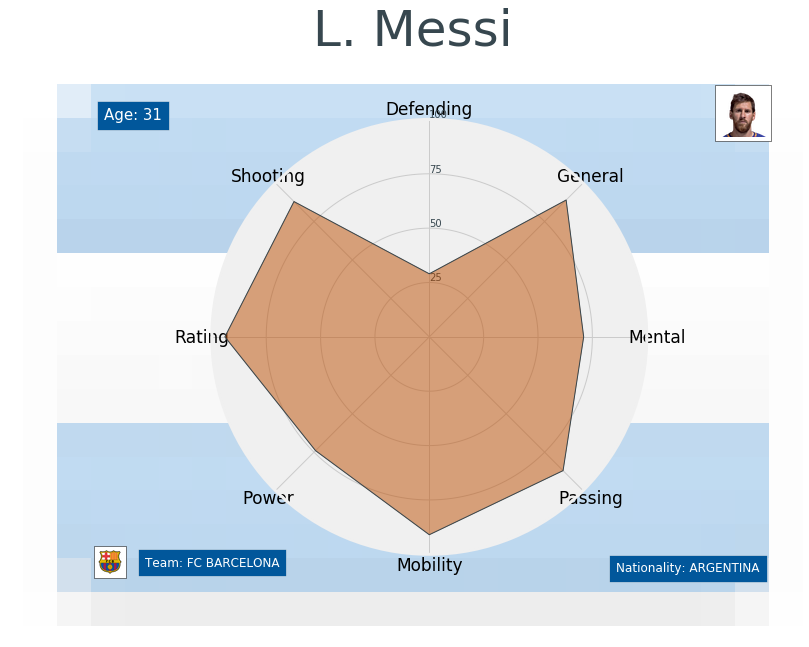

In [ ]:
graphPolar(0)

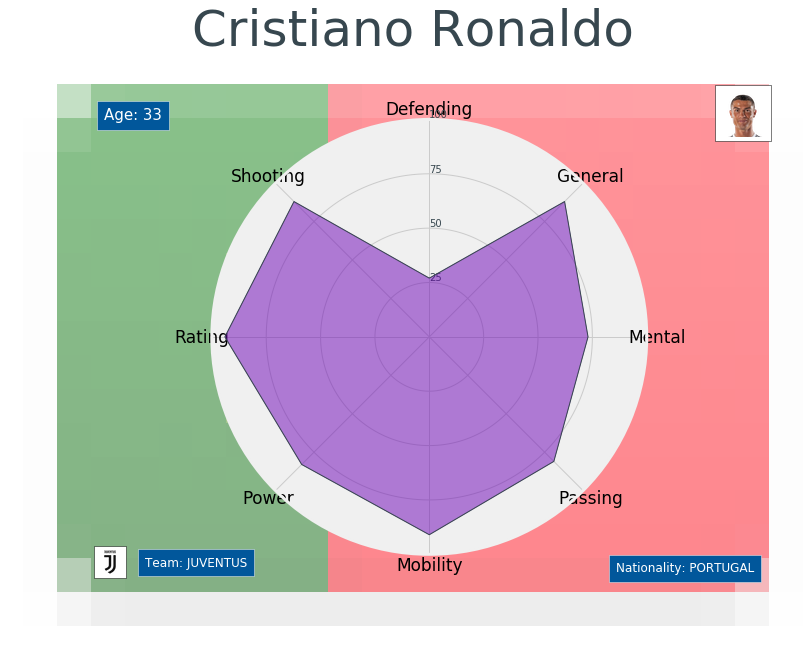

In [ ]:
graphPolar(1)

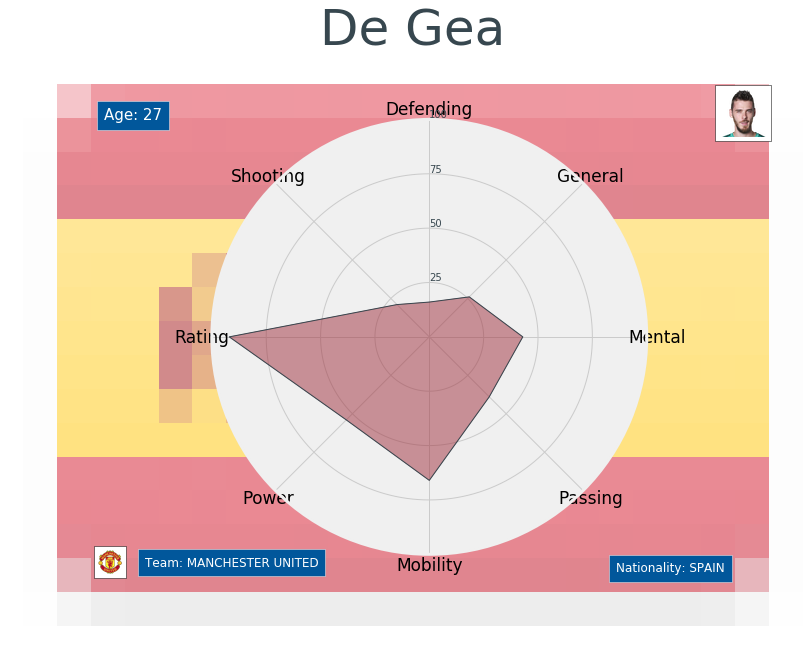

In [ ]:
graphPolar(3)

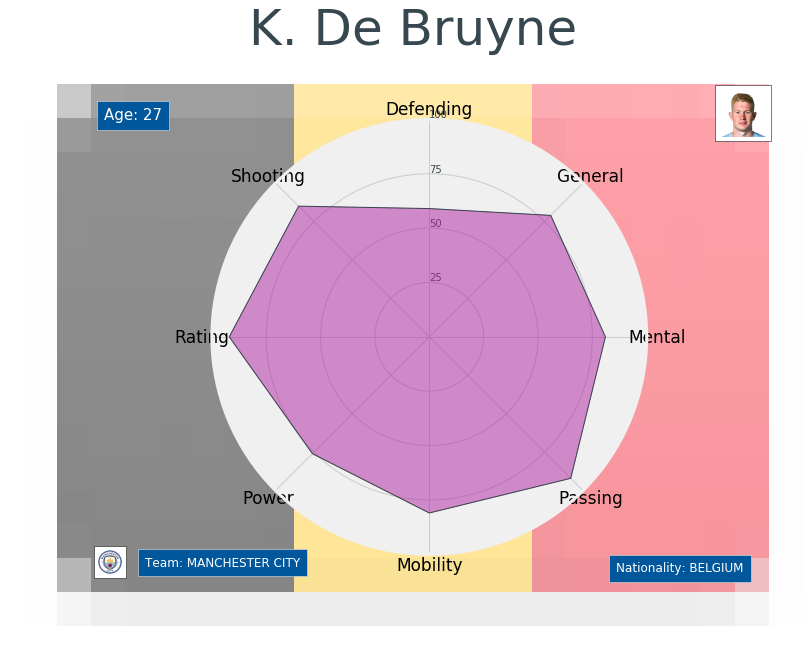

In [ ]:
graphPolar(4)

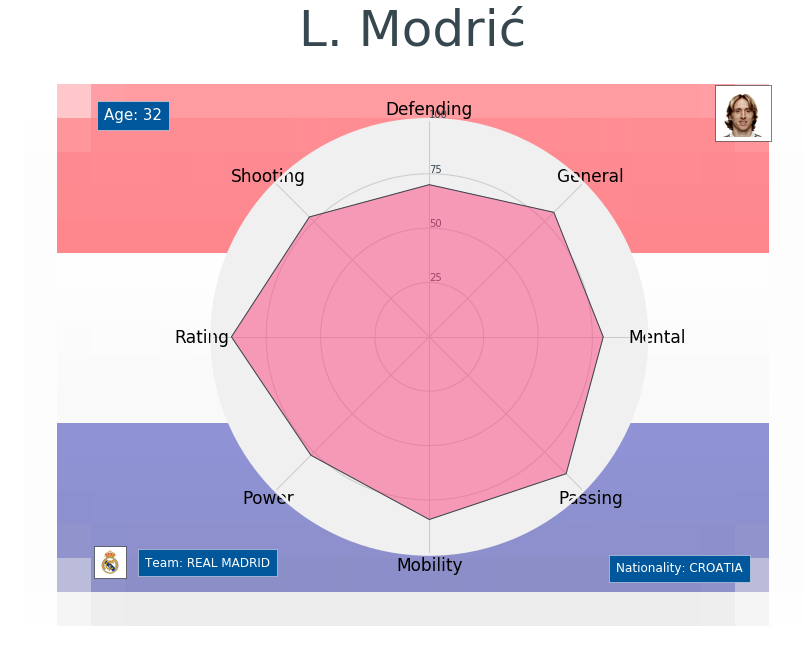

In [ ]:
graphPolar(6)

Text(0.5, 1.0, 'Most Preferred Foot of the Players')

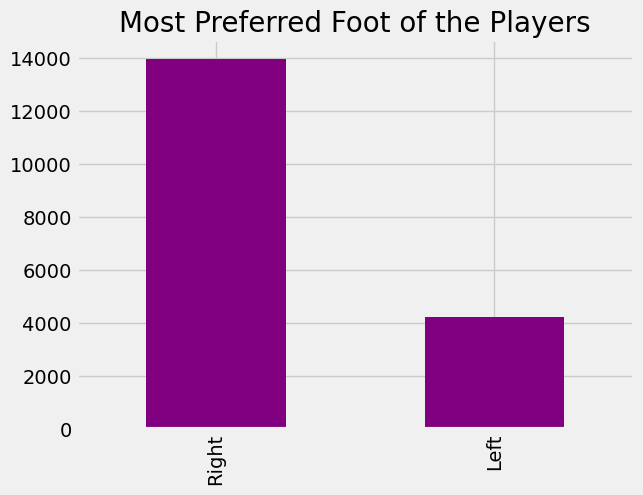

In [26]:
# comparison of preferred foot over the different players

data['Preferred Foot'].value_counts().head(50).plot.bar(color = 'purple')
plt.title('Most Preferred Foot of the Players', fontsize = 20)

In [30]:
#  comparison of international reputation among the players

data['International Reputation'].value_counts()

1.0    16580
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

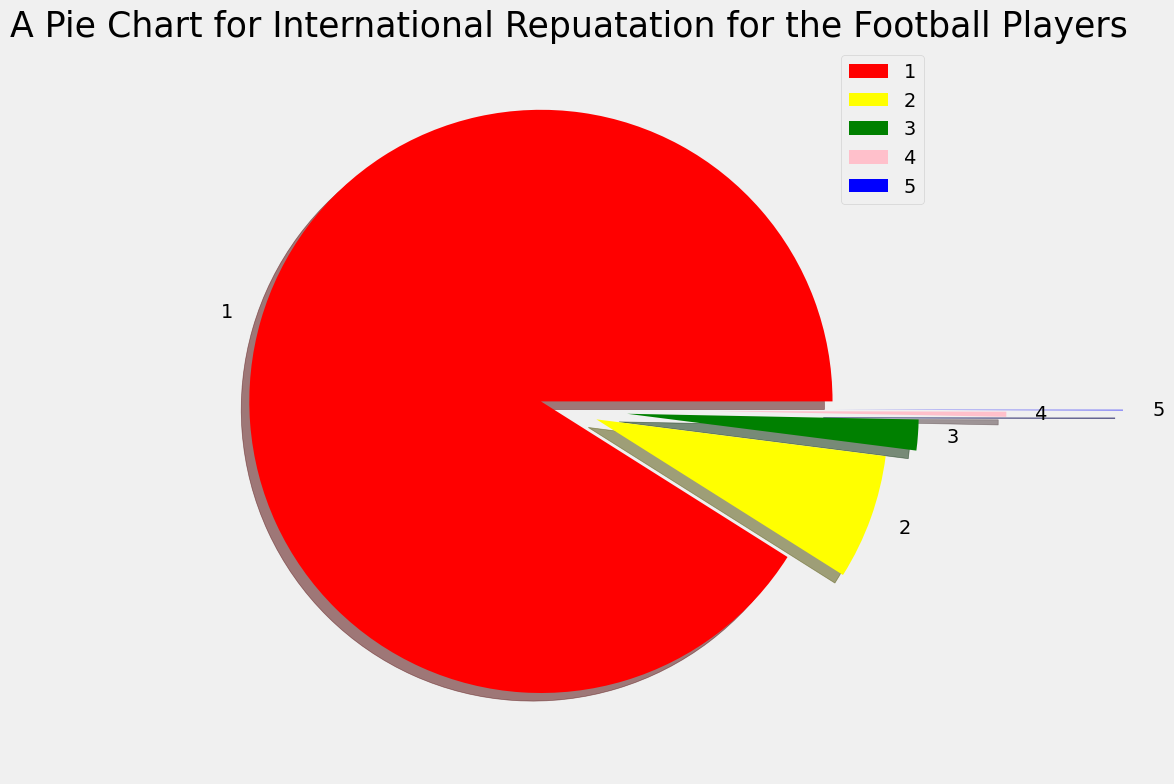

In [31]:
# plotting a pie chart to represent share of international repuatation

labels = ['1', '2', '3', '4', '5']
sizes = [16532, 1261, 309, 51, 6]
colors = ['red', 'yellow', 'green', 'pink', 'blue']
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('A Pie Chart for International Repuatation for the Football Players', fontsize = 25)
plt.legend()
plt.show()

In [34]:
# A player's foot (left or right) that is weaker than their preferred foot. A player's attribute rated between 1 to 5 
# which specifies the shot power and ball control for the other foot of that player than his preferred foot's.The higher
# rate defines the higher shot power and ball control.

data['Weak Foot'].value_counts()

3.0    11397
2.0     3761
4.0     2662
5.0      229
1.0      158
Name: Weak Foot, dtype: int64

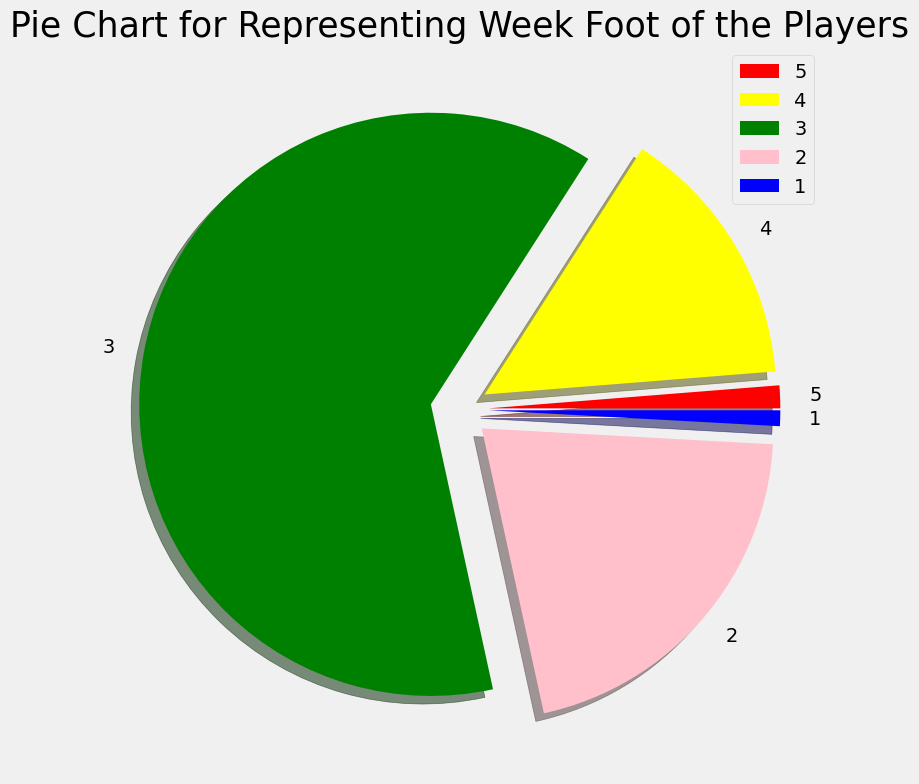

In [35]:
# plotting a pie chart to represent the share of week foot players

labels = ['5', '4', '3', '2', '1'] 
size = [229, 2662, 11349, 3761, 158]
colors = ['red', 'yellow', 'green', 'pink', 'blue']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('Pie Chart for Representing Week Foot of the Players', fontsize = 25)
plt.legend()
plt.show()

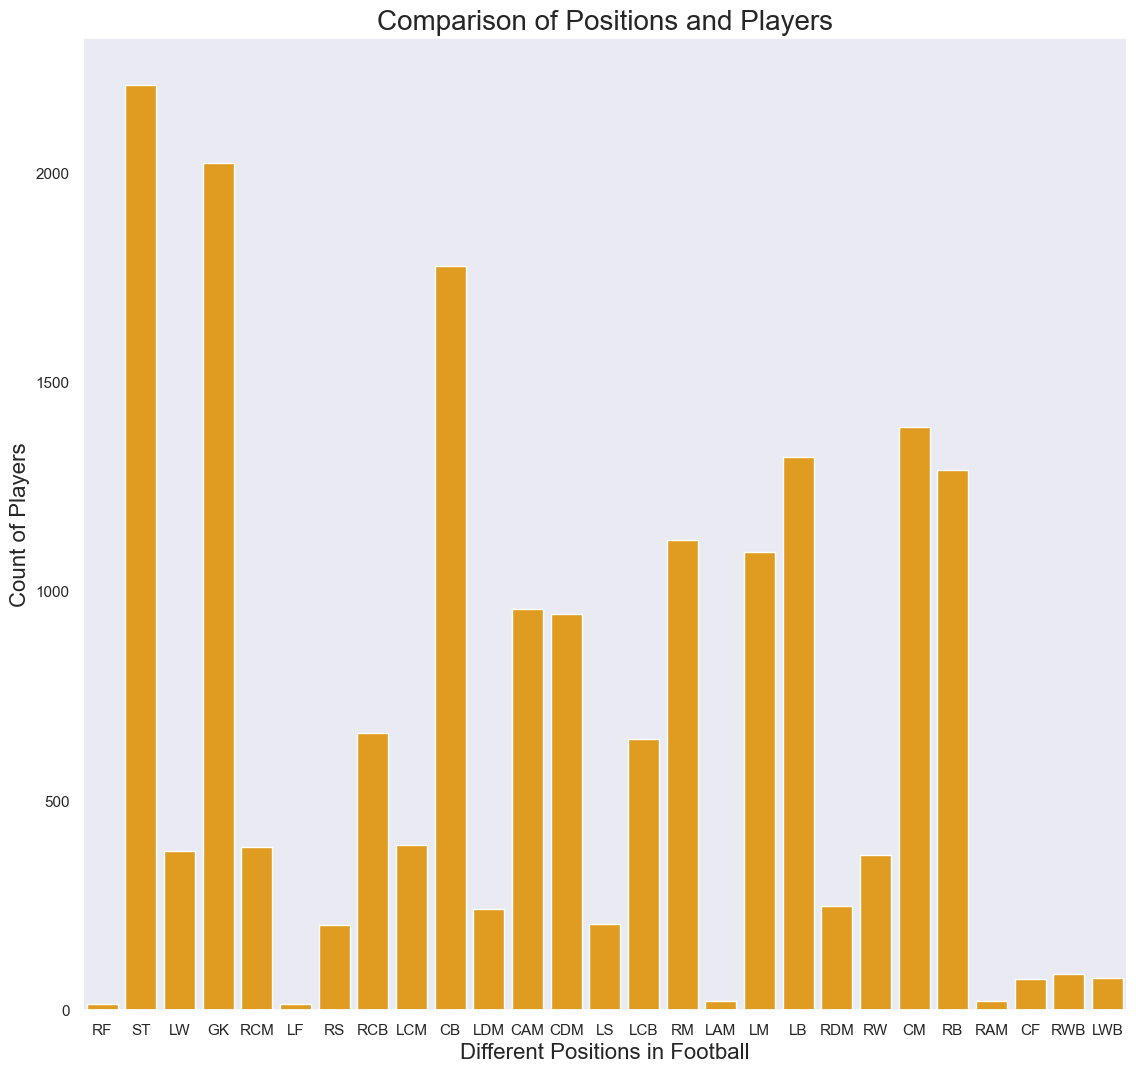

In [51]:
# different positions acquired by the players 

plt.figure(figsize = (12, 12))
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
ax = sns.countplot(x='Position',data = data, color = 'orange')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

In [ ]:
# defining a function for cleaning the Weight data

def extract_value_from(value):
  out = value.replace('lbs', '')
  return float(out)

# applying the function to weight column
#data['value'] = data['value'].apply(lambda x: extract_value_from(x))
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))

data['Weight'].head()

In [57]:
# defining a function for cleaning the wage column

def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [ ]:
# applying the function to the wage column

data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

data['Wage'].head()

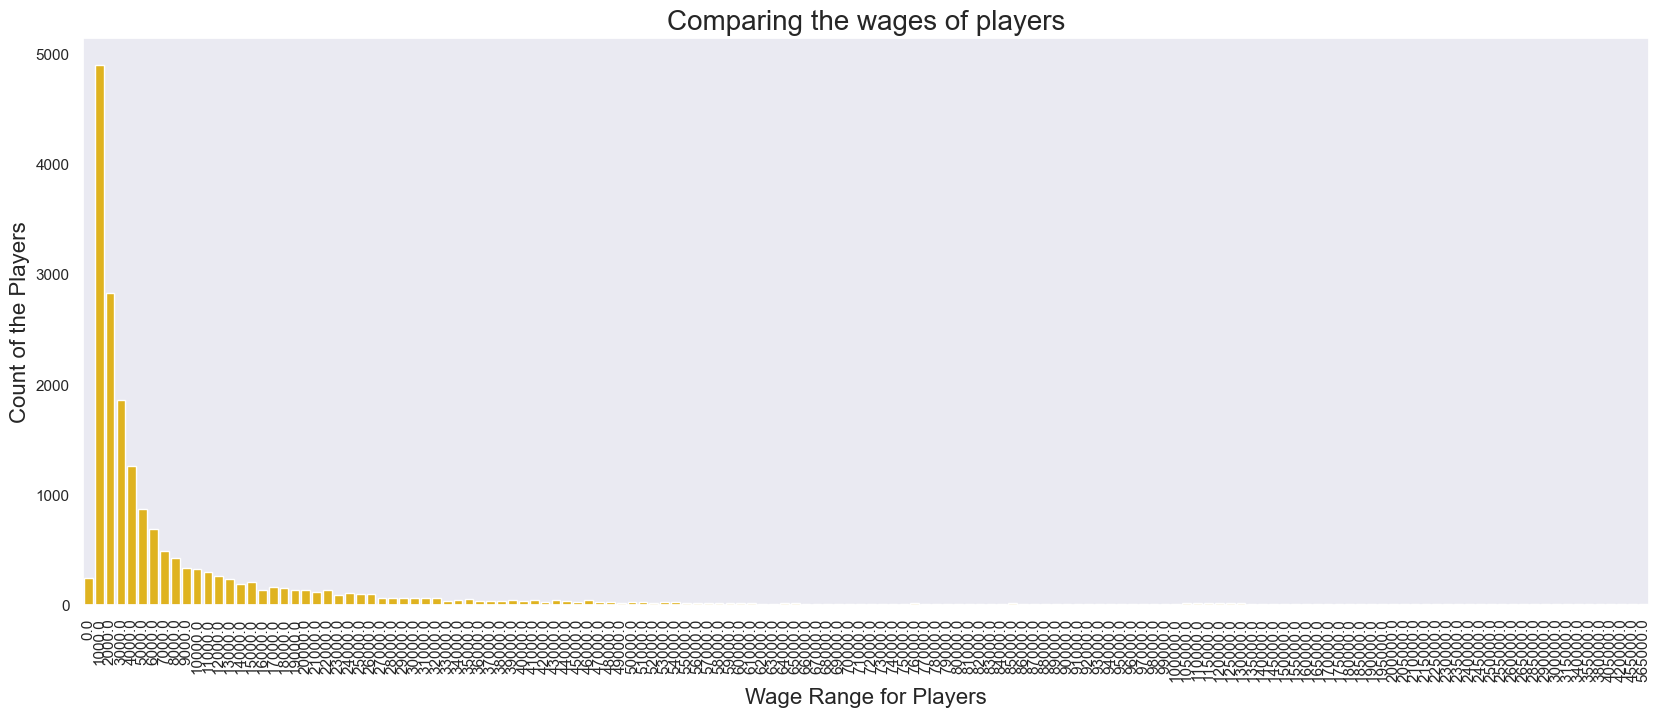

In [58]:
# Comparing the players' Wages

sns.set(style = 'dark', palette = 'bright', color_codes = True)
x = data.Wage
plt.rcParams['figure.figsize'] = (18, 7)
sns.countplot( x = 'Wage', data = data, color = 'y')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Comparing the wages of players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

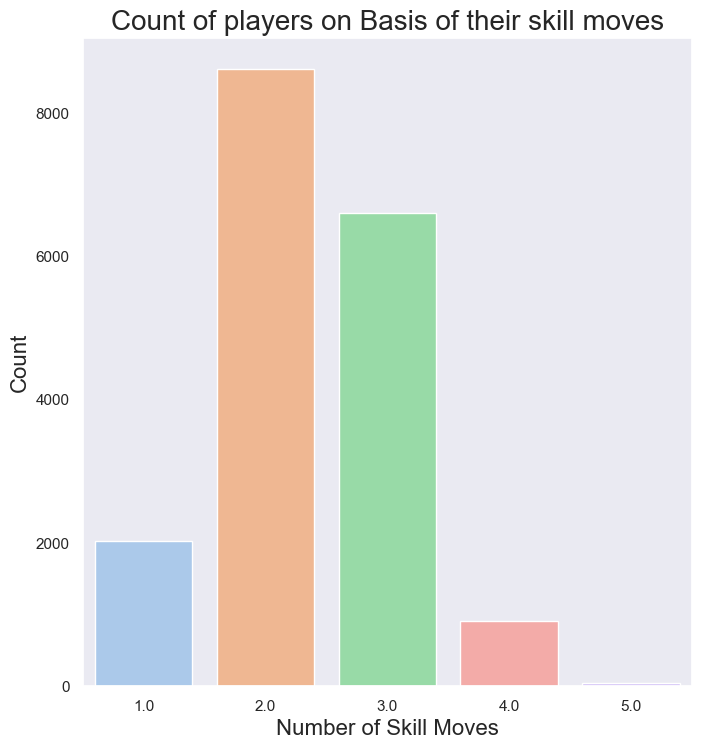

In [59]:
# Skill Moves of Players

plt.figure(figsize = (7, 8))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

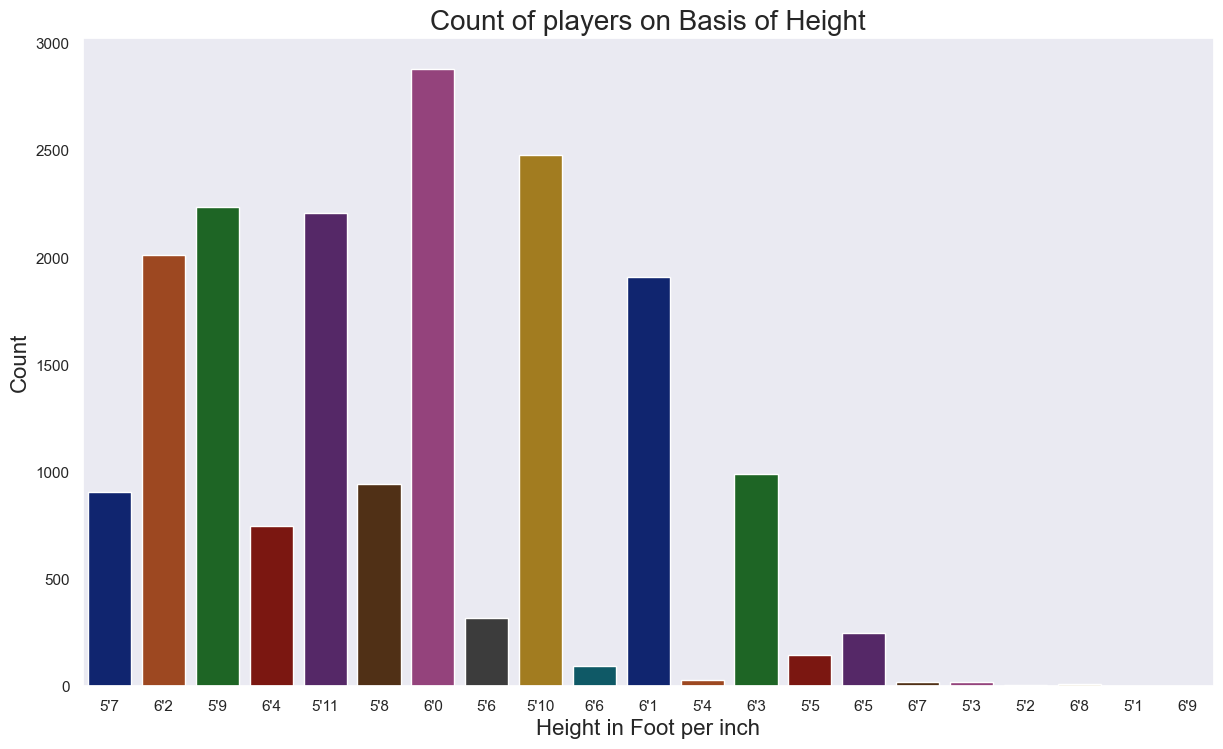

In [60]:
# Height of Players

plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = data, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()


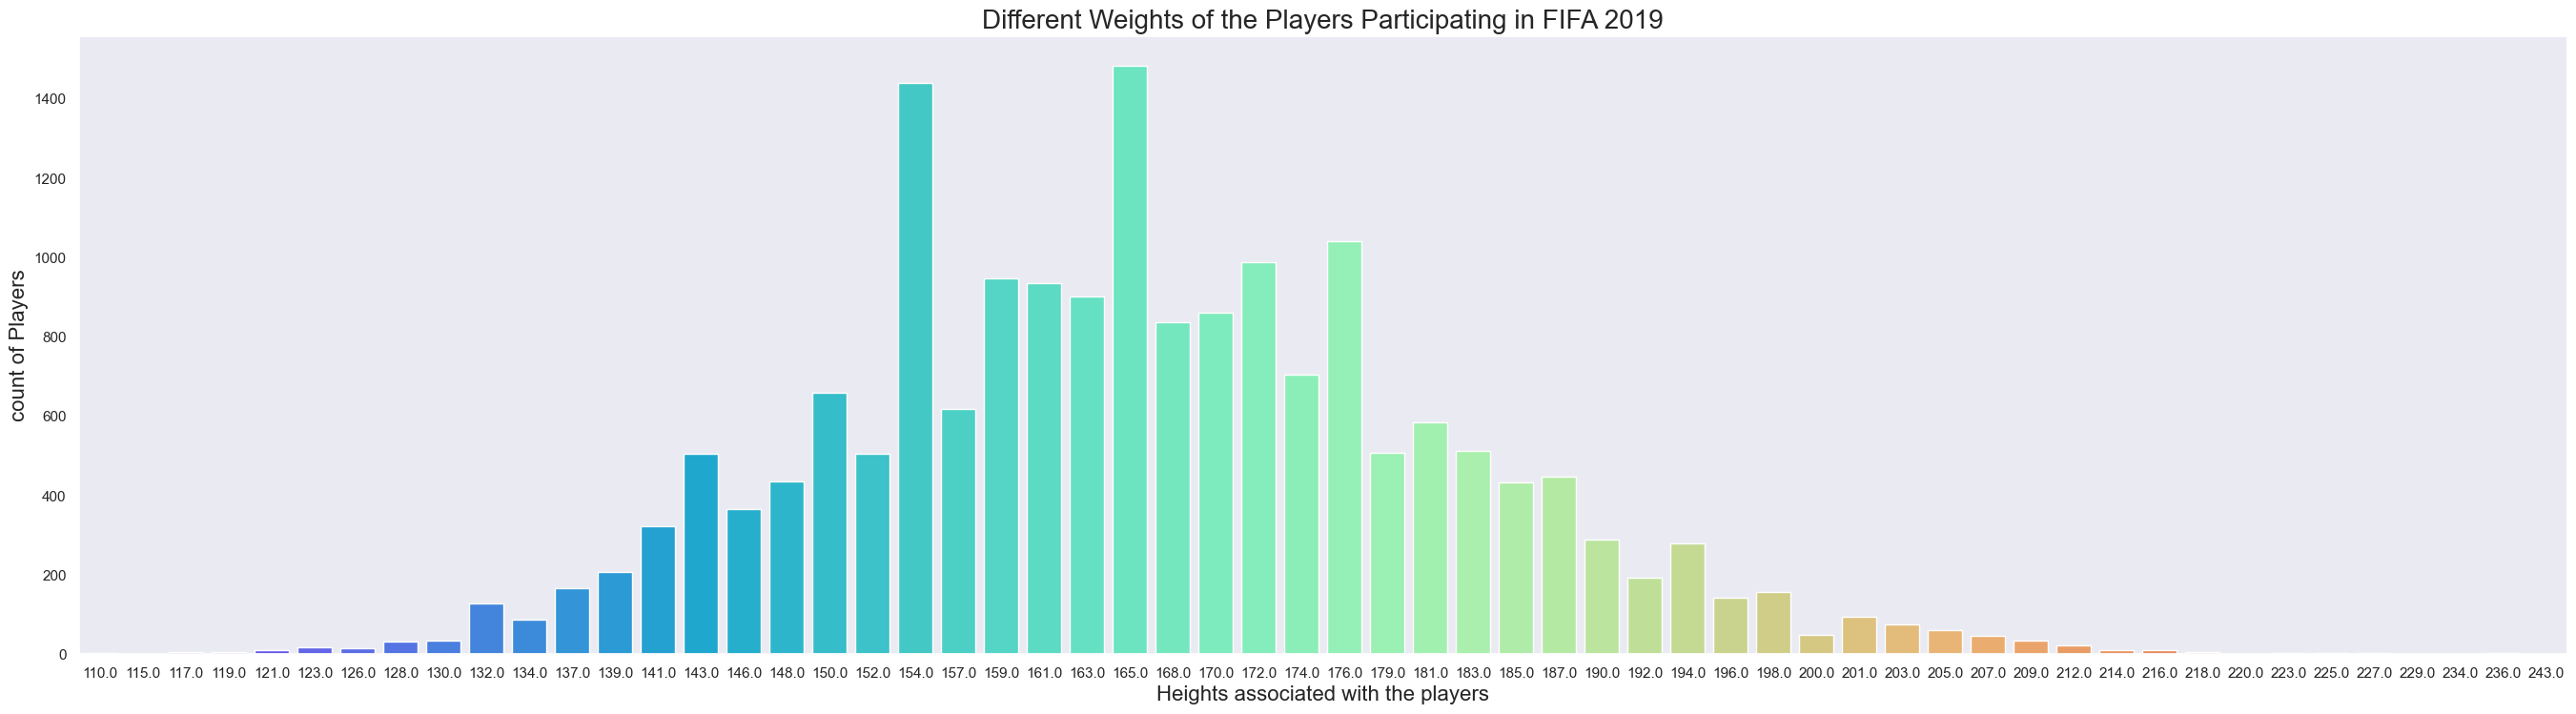

In [61]:
# To show Different body weight of the players participating in the FIFA 2019

plt.figure(figsize = (30, 8))
sns.countplot(x = 'Weight', data = data, palette = 'rainbow')
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

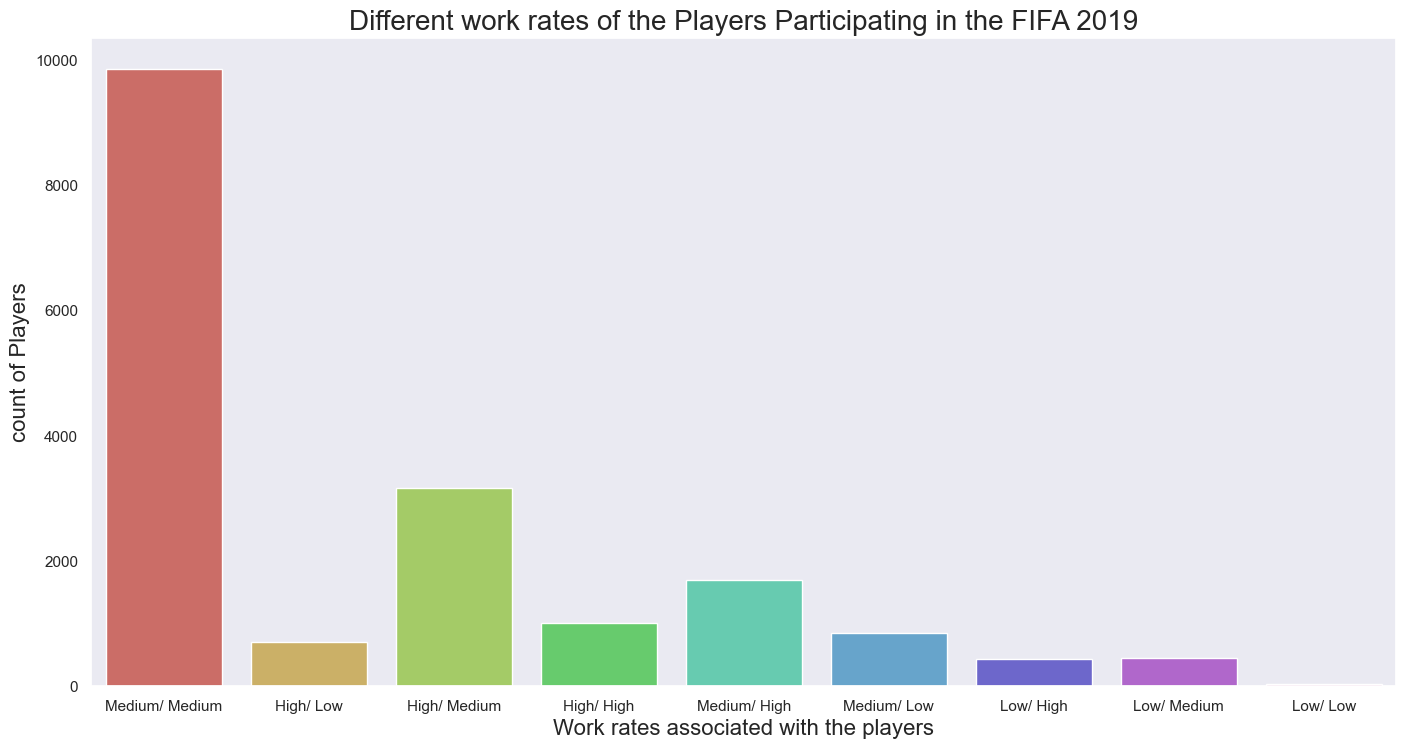

In [62]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (15, 8))
sns.countplot(x = 'Work Rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

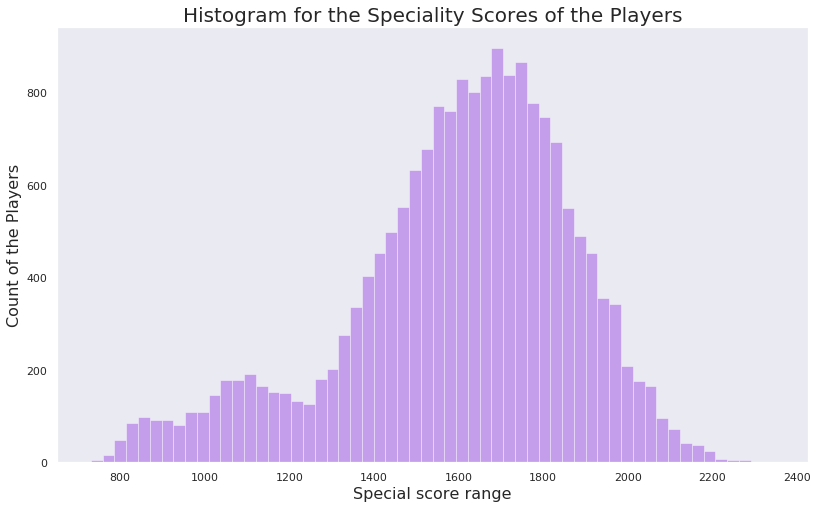

In [ ]:
# To show Different Speciality Score of the players participating in the FIFA 2019

x = data.Special
plt.figure(figsize = (12, 8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'm')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

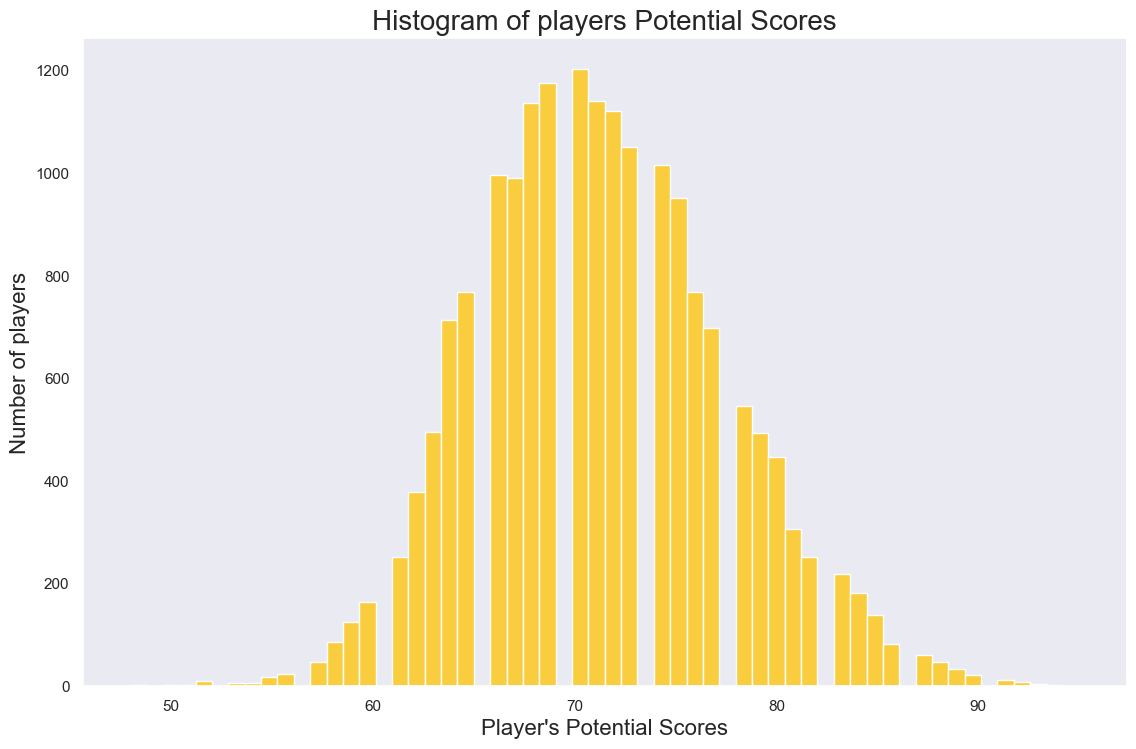

In [64]:
# To show Different potential scores of the players participating in the FIFA 2019

x = data.Potential
plt.figure(figsize=(12,8))
ax = sns.histplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 20)
plt.show()

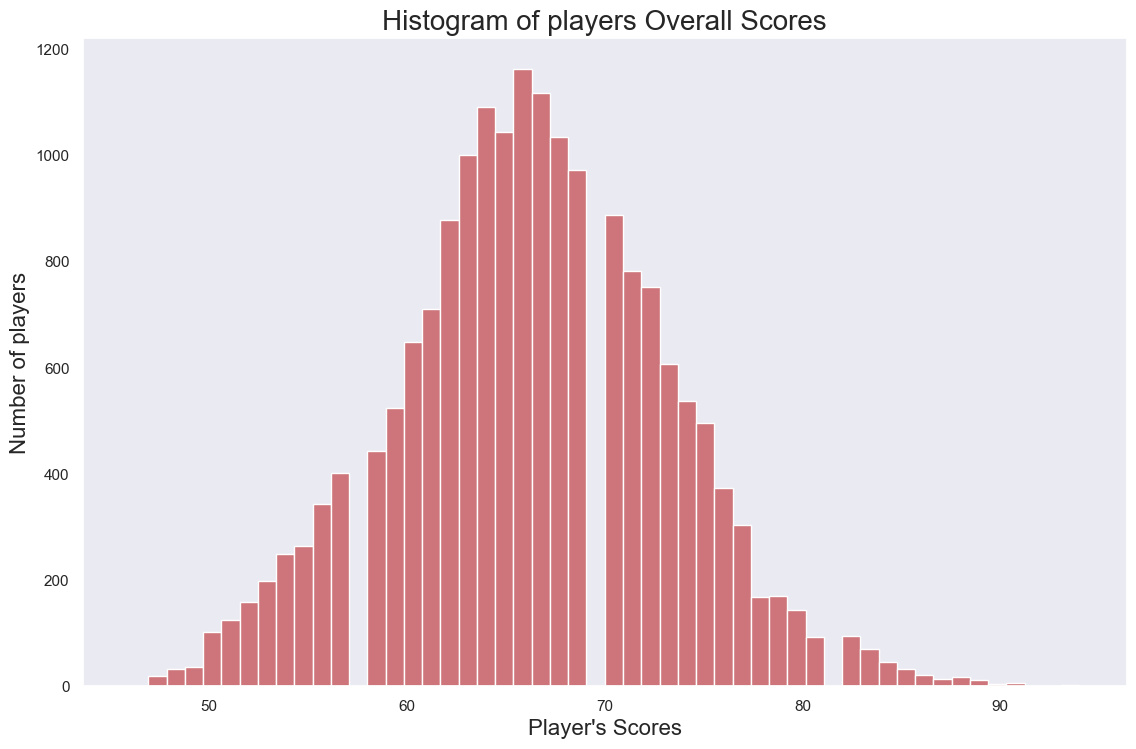

In [66]:
# To show Different overall scores of the players participating in the FIFA 2019

sns.set(style = "dark", palette = "deep", color_codes = True)
x = data.Overall
plt.figure(figsize = (12,8))
ax = sns.histplot(x, bins = 52, kde = False, color = 'r')
ax.set_xlabel(xlabel = "Player\'s Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 20)
plt.show()

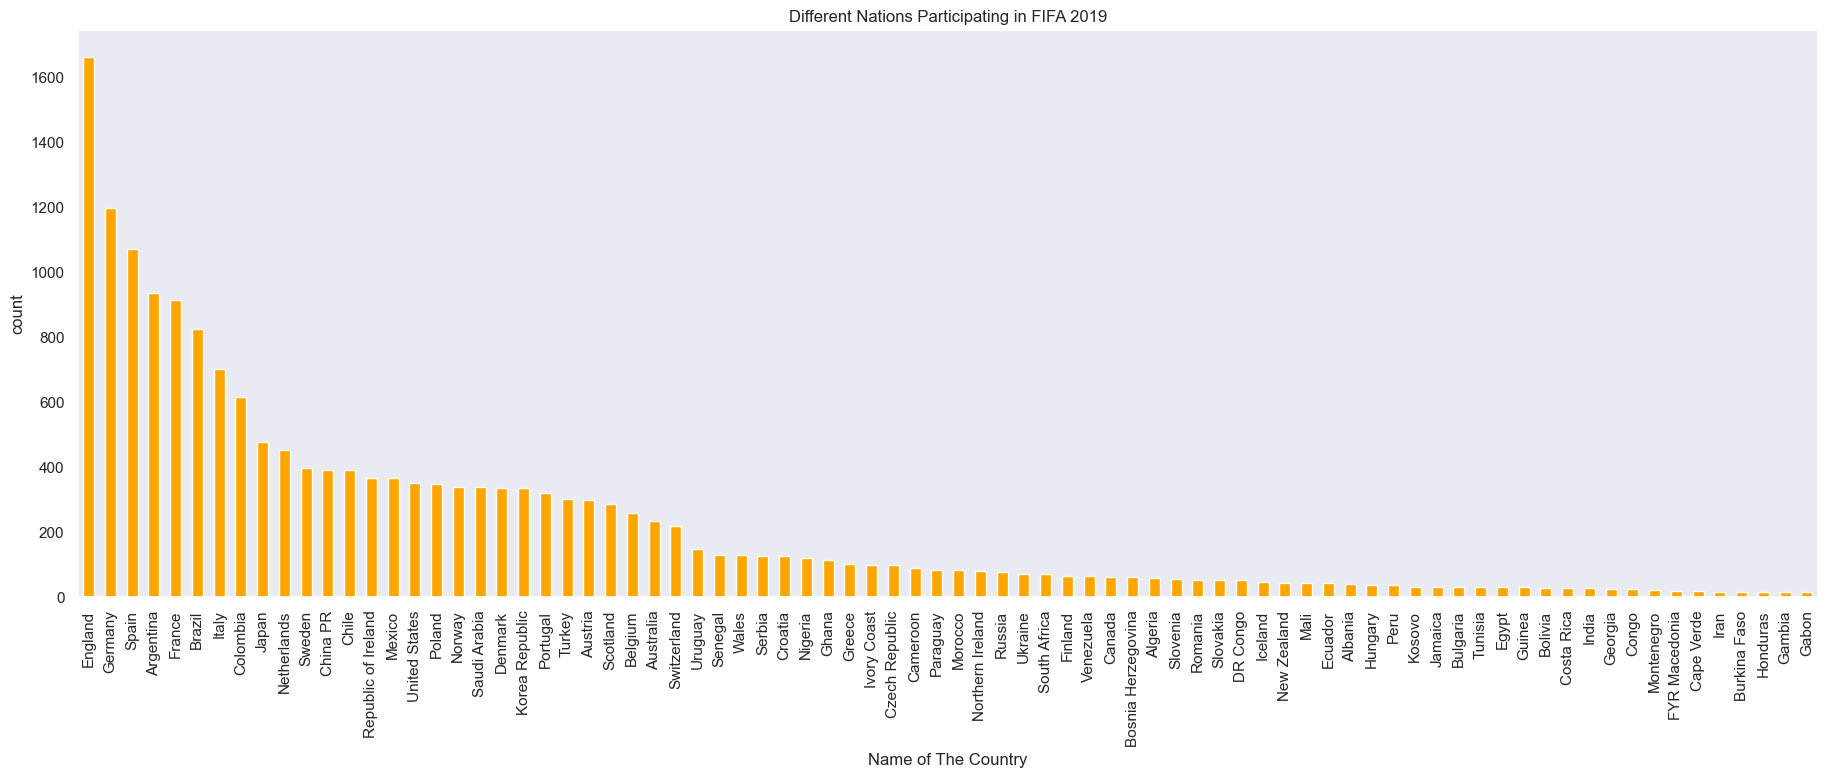

In [67]:
# To show Different nations participating in the FIFA 2019

data['Nationality'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different Nations Participating in FIFA 2019')
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

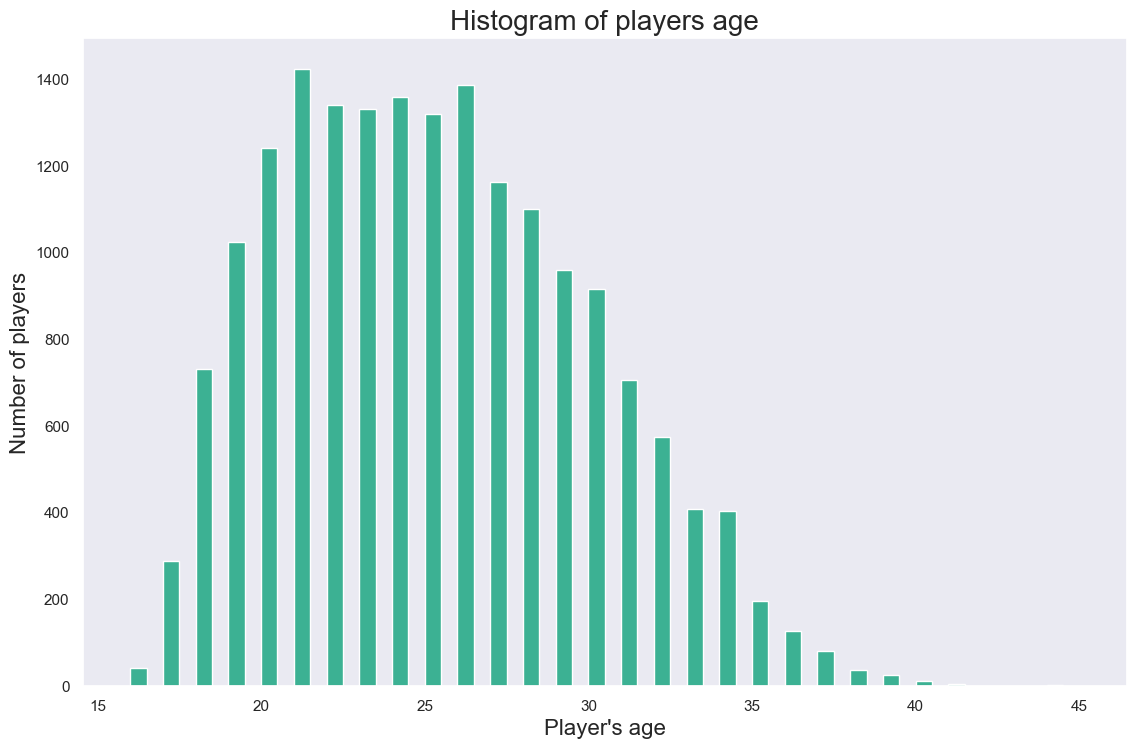

In [69]:
# To show that there are people having same age
# Histogram: number of players's age

sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = data.Age
plt.figure(figsize = (12,8))
ax = sns.histplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.show()

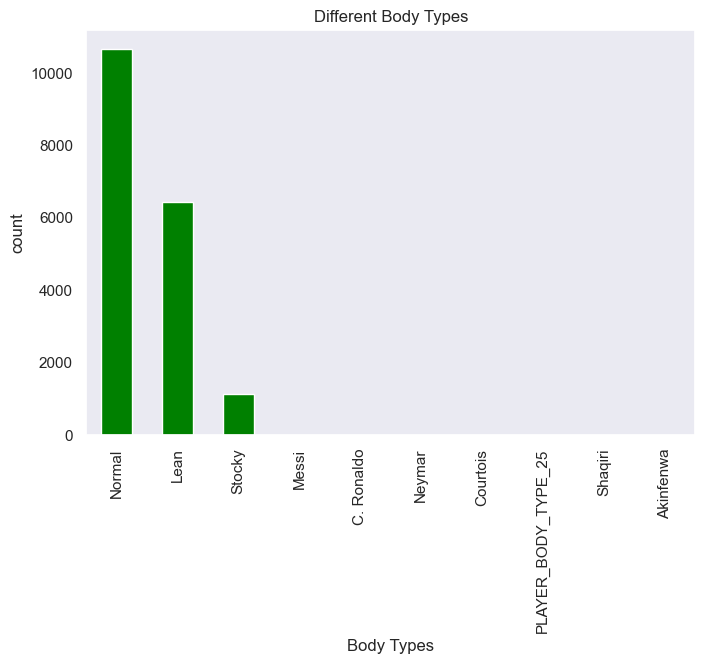

In [70]:
#comparing the different body types of the players participating in FIFA 2019

data['Body Type'].value_counts().plot.bar(color = 'green', figsize = (7, 5))
plt.title('Different Body Types')
plt.xlabel('Body Types')
plt.ylabel('count')
plt.show()

In [71]:
# selecting some of the interesting and important columns from the set of columns in the given dataset

selected_columns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

data_selected = pd.DataFrame(data, columns = selected_columns)
data_selected.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

Text(0.5, 1.0, 'Comparison of Overall Scores and age wrt Preferred foot')

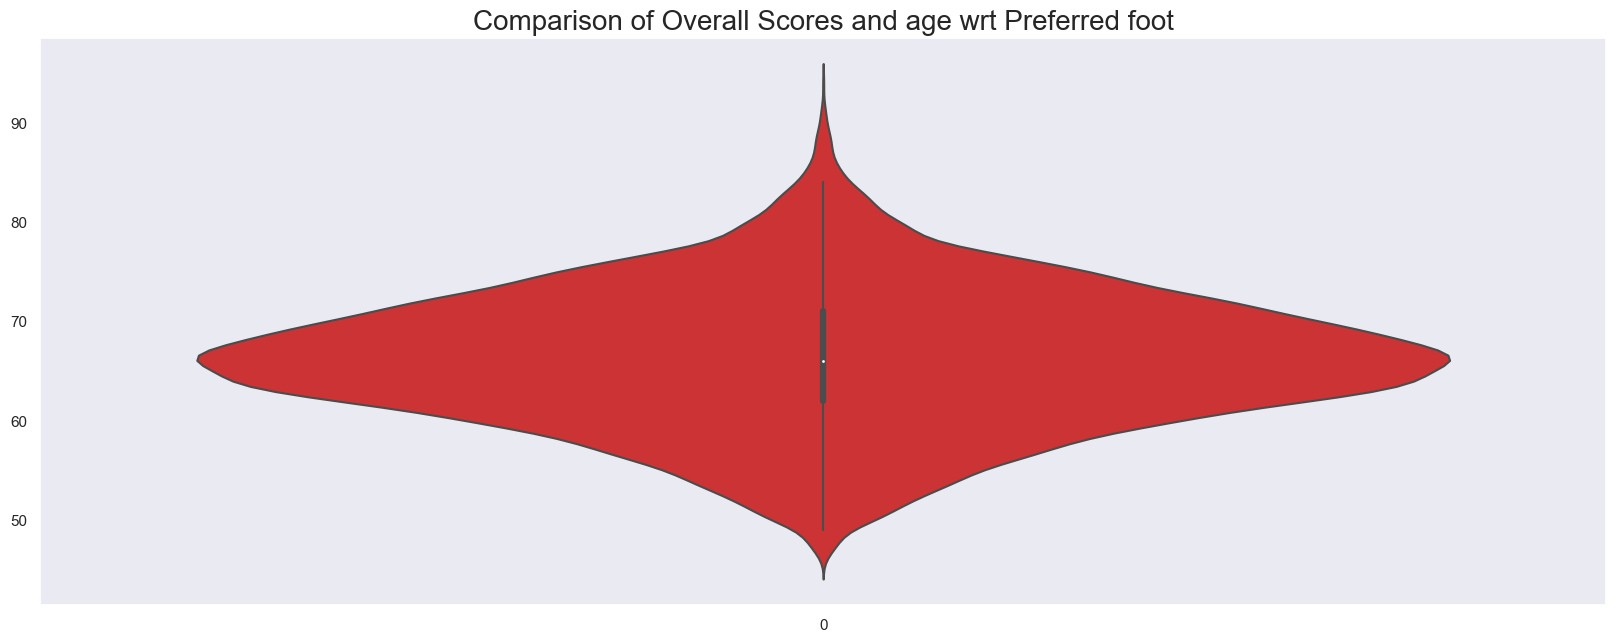

In [74]:
# violin plot 

plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['Overall'], data['Age'], hue = data['Preferred Foot'], palette = 'Set1')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)

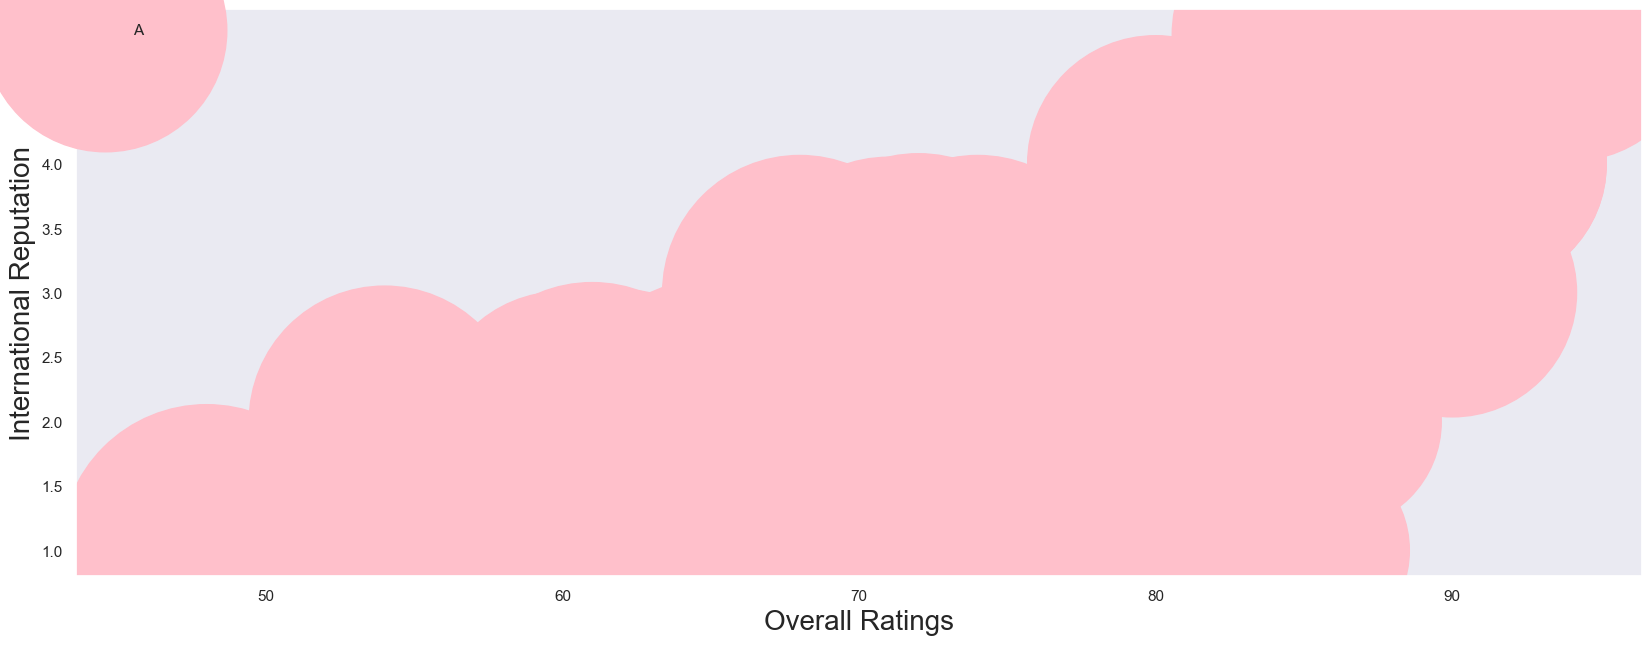

In [75]:
# bubble plot

plt.scatter(data['Overall'], data['International Reputation'], s = data['Age']*1000, c = 'pink')
plt.xlabel('Overall Ratings', fontsize = 20)
plt.ylabel('International Reputation', fontsize = 20)
plt.legend('Age')
plt.show()

In [76]:
# having a look at the sample of selected data

data_selected.sample(5)

Name  Age Nationality  Overall  Potential  \
10504         J. Mills   28     England       65         65   
4425       B. Marshall   27     England       71         71   
2266   Hélton Celanova   26      Brazil       74         74   
4056           A. Cole   37     England       71         71   
6489        S. Rosales   23   Argentina       69         77   

                              Club      Value     Wage  Special  \
10504          Forest Green Rovers   425000.0   4000.0     1809   
4425                  Norwich City  2500000.0  18000.0     1924   
2266                 Internacional  6000000.0  25000.0     1701   
4056                     LA Galaxy   270000.0   4000.0     1888   
6489   Gimnasia y Esgrima La Plata  1500000.0   8000.0     1681   

      Preferred Foot  ...  Composure  Marking  StandingTackle SlidingTackle  \
10504           Left  ...       64.0     61.0            63.0          60.0   
4425           Right  ...       66.0     62.0            64.0          62.0   
2266            Left  ...       74.0     13.0            18.0          10.0   
4056            Left  ...       73.0     70.0            67.0          71.0   
6489           Right  ...       63.0     13.0            17.0          14.0   

      GKDiving GKHandling GKKicking  GKPositioning  GKReflexes  Release Clause  
10504     13.0       16.0      16.0            8.0        13.0           €744K  
4425       9.0       10.0       7.0            6.0         9.0           €4.7M  
2266      10.0       10.0      18.0           10.0        13.0          €11.4M  
4056      14.0        7.0      14.0            6.0         6.0           €405K  
6489      15.0       10.0      12.0           13.0        14.0               0  

[5 rows x 52 columns]

C:\Users\Netra\AppData\Local\Temp\ipykernel_8856\1701815298.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)


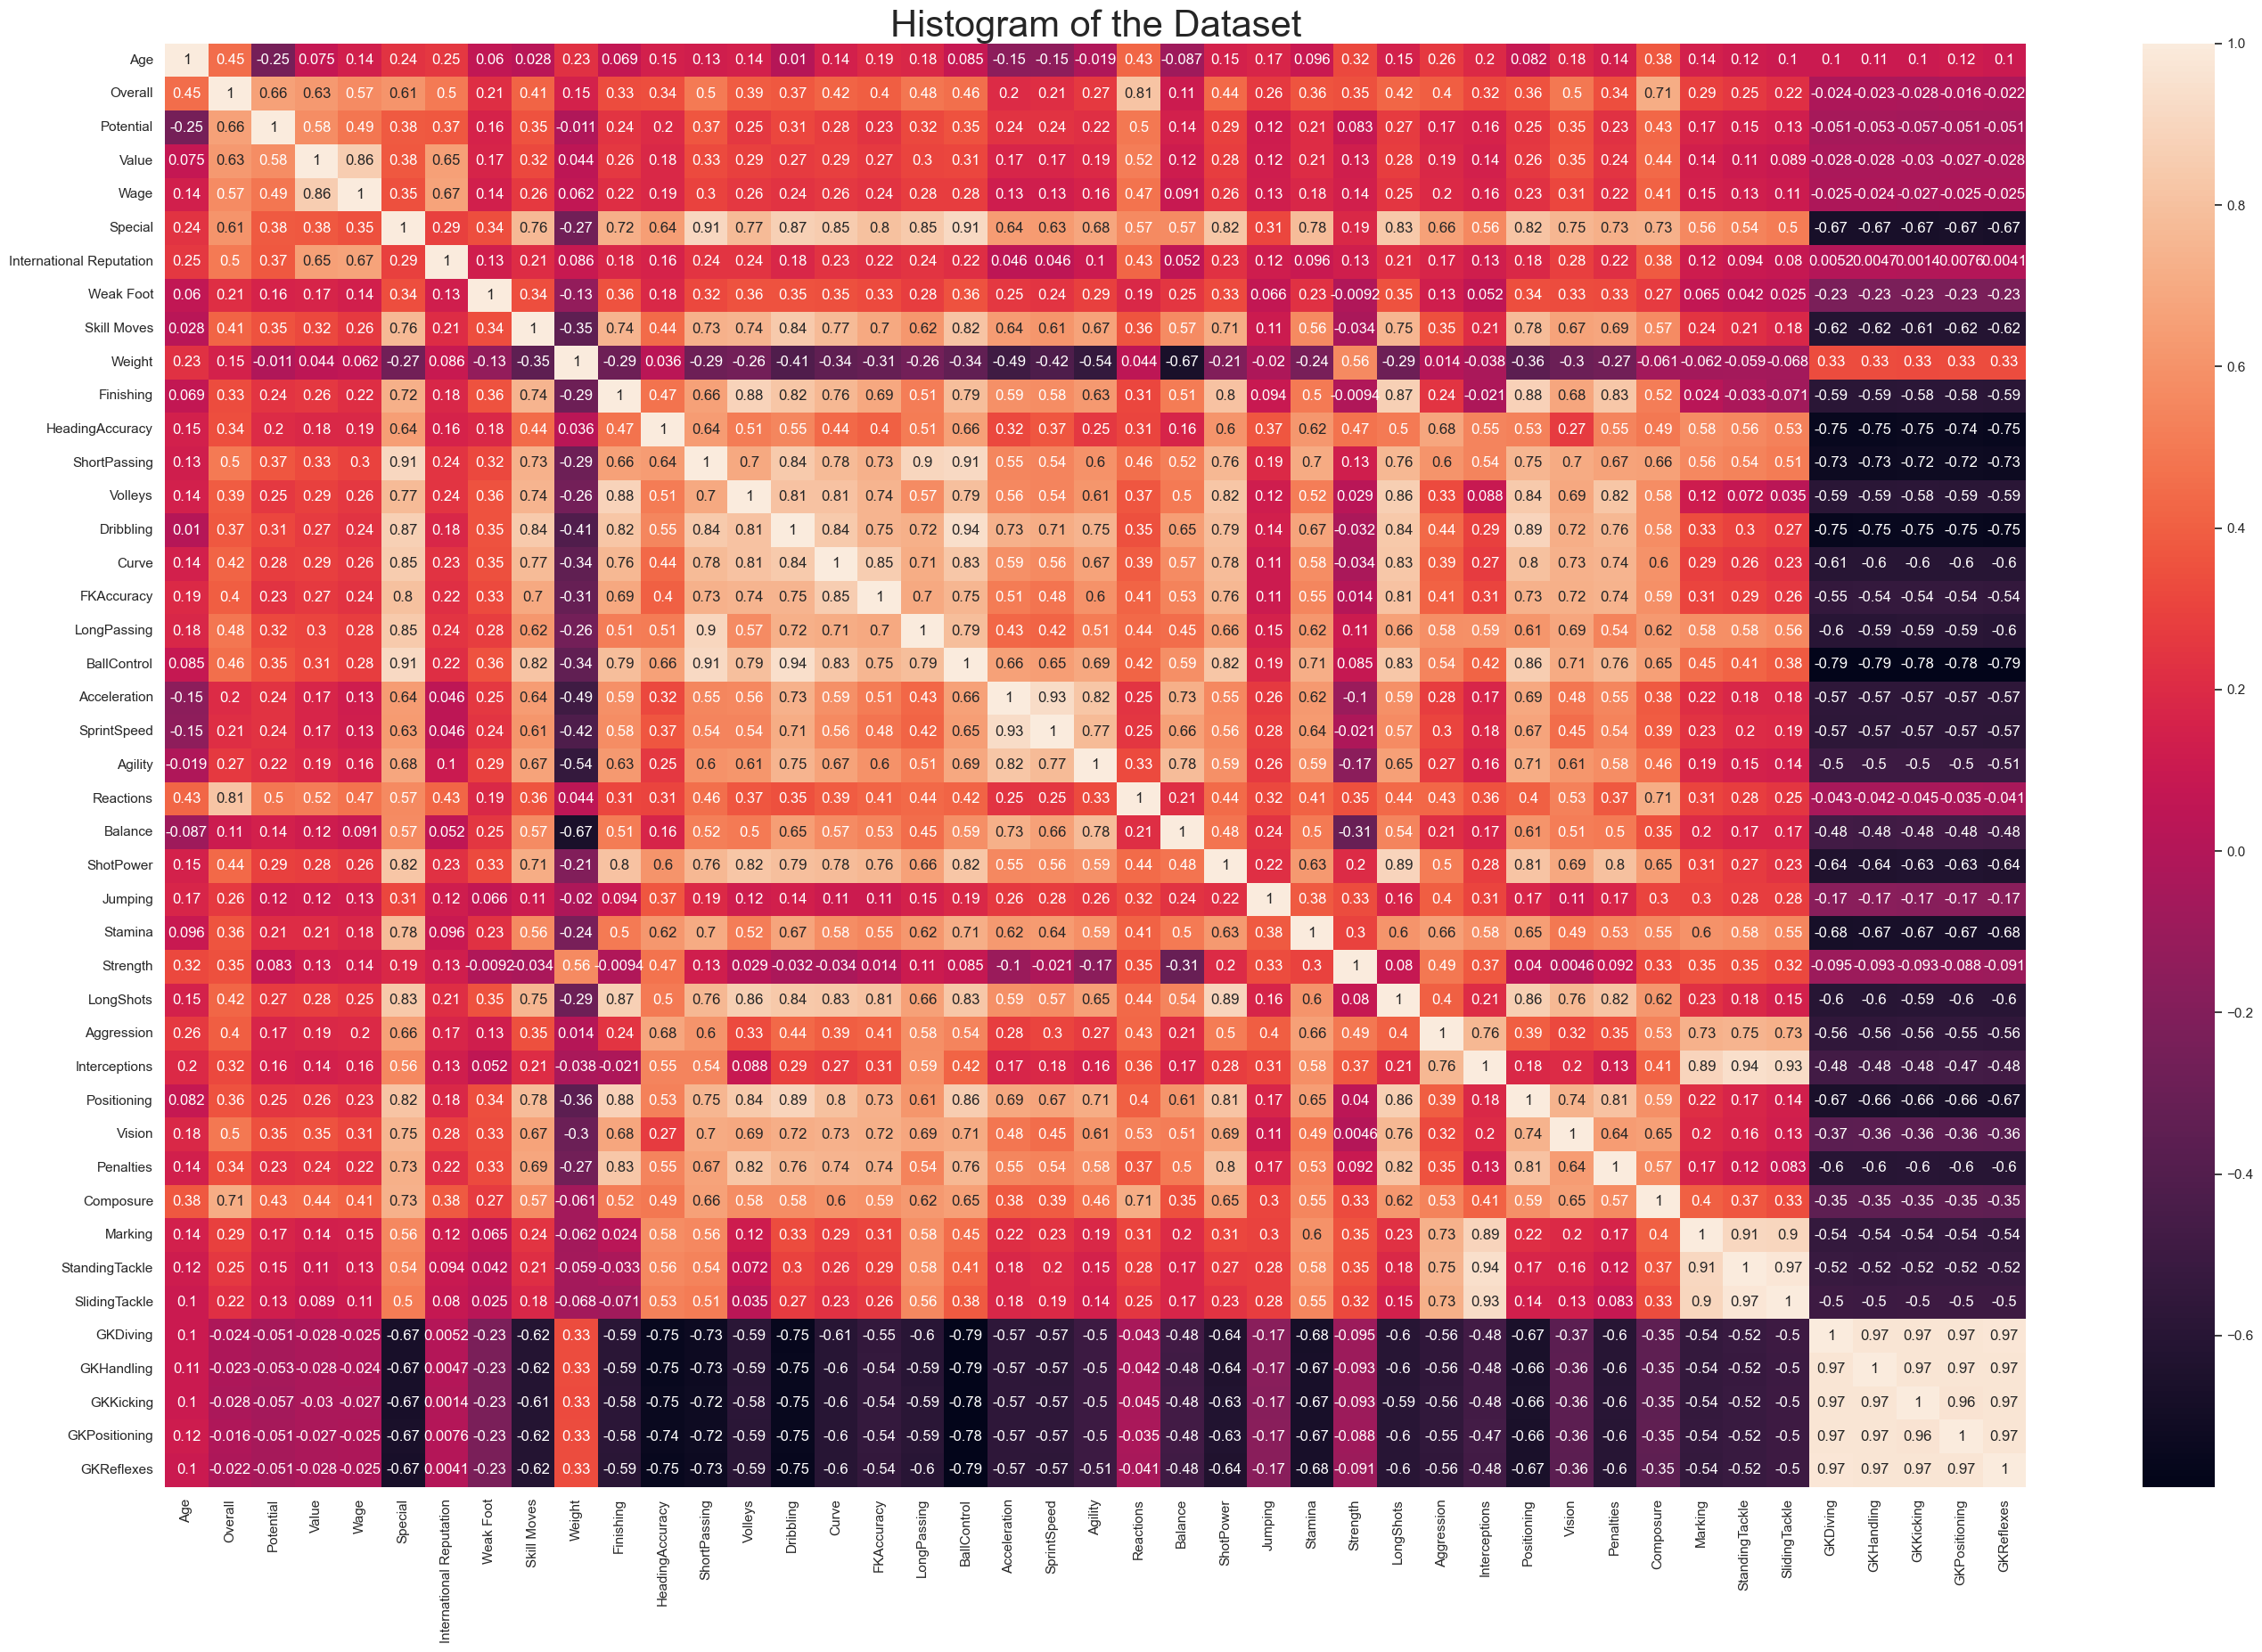

In [77]:
# plotting a correlation heatmap

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data_selected[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)

plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

**Best Players per each position with their age, club, and nationality based on their Overall Scores**

In [78]:
# best players per each position with their age, club, and nationality based on their overall scores

data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]


Position               Name  Age                      Club Nationality
17       CAM       A. Griezmann   27           Atlético Madrid      France
12        CB           D. Godín   32           Atlético Madrid     Uruguay
20       CDM    Sergio Busquets   29              FC Barcelona       Spain
271       CF       Luis Alberto   25                     Lazio       Spain
67        CM             Thiago   27         FC Bayern München       Spain
3         GK             De Gea   27         Manchester United       Spain
28       LAM       J. Rodríguez   26         FC Bayern München    Colombia
35        LB            Marcelo   30               Real Madrid      Brazil
24       LCB       G. Chiellini   33                  Juventus       Italy
11       LCM           T. Kroos   28               Real Madrid     Germany
14       LDM           N. Kanté   27                   Chelsea      France
5         LF          E. Hazard   27                   Chelsea     Belgium
33        LM      P. Aubameyang   29                   Arsenal       Gabon
21        LS          E. Cavani   31       Paris Saint-Germain     Uruguay
2         LW          Neymar Jr   26       Paris Saint-Germain      Brazil
474      LWB          N. Schulz   25       TSG 1899 Hoffenheim     Germany
129      RAM        J. Cuadrado   30                  Juventus    Colombia
69        RB        Azpilicueta   28                   Chelsea       Spain
8        RCB       Sergio Ramos   32               Real Madrid       Spain
4        RCM       K. De Bruyne   27           Manchester City     Belgium
45       RDM           P. Pogba   25         Manchester United      France
0         RF           L. Messi   31              FC Barcelona   Argentina
25        RM          K. Mbappé   19       Paris Saint-Germain      France
7         RS          L. Suárez   31              FC Barcelona     Uruguay
56        RW     Bernardo Silva   23           Manchester City    Portugal
450      RWB          M. Ginter   24  Borussia Mönchengladbach     Germany
1         ST  Cristiano Ronaldo   33                  Juventus    Portugal

**Best Players from each positions with their age, nationality, club based on their Potential Scores**

In [81]:
# best players from each positions with their age, nationality, club based on their potential scores

data.iloc[data.groupby(data['Position'])['Potential'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

Position                 Name  Age                     Club Nationality
31       CAM           C. Eriksen   26        Tottenham Hotspur     Denmark
42        CB            S. Umtiti   24             FC Barcelona      France
27       CDM             Casemiro   26              Real Madrid      Brazil
350       CF             A. Milik   24                   Napoli      Poland
78        CM  S. Milinković-Savić   23                    Lazio      Serbia
3         GK               De Gea   27        Manchester United       Spain
28       LAM         J. Rodríguez   26        FC Bayern München    Colombia
35        LB              Marcelo   30              Real Madrid      Brazil
77       LCB          M. Škriniar   23                    Inter    Slovakia
11       LCM             T. Kroos   28              Real Madrid     Germany
14       LDM             N. Kanté   27                  Chelsea      France
15        LF            P. Dybala   24                 Juventus   Argentina
415       LM             H. Aouar   20       Olympique Lyonnais      France
21        LS            E. Cavani   31      Paris Saint-Germain     Uruguay
2         LW            Neymar Jr   26      Paris Saint-Germain      Brazil
601      LWB                Jonny   24  Wolverhampton Wanderers       Spain
171      RAM            H. Ziyech   25                     Ajax     Morocco
247       RB         João Cancelo   24                 Juventus    Portugal
8        RCB         Sergio Ramos   32              Real Madrid       Spain
4        RCM         K. De Bruyne   27          Manchester City     Belgium
45       RDM             P. Pogba   25        Manchester United      France
0         RF             L. Messi   31             FC Barcelona   Argentina
25        RM            K. Mbappé   19      Paris Saint-Germain      France
7         RS            L. Suárez   31             FC Barcelona     Uruguay
79        RW        Marco Asensio   22              Real Madrid       Spain
766      RWB         Pablo Maffeo   20            VfB Stuttgart       Spain
1         ST    Cristiano Ronaldo   33                 Juventus    Portugal

In [82]:
# picking up the countries with highest number of players to compare their overall scores

data['Nationality'].value_counts().head(8)

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Brazil        827
Italy         702
Colombia      618
Name: Nationality, dtype: int64

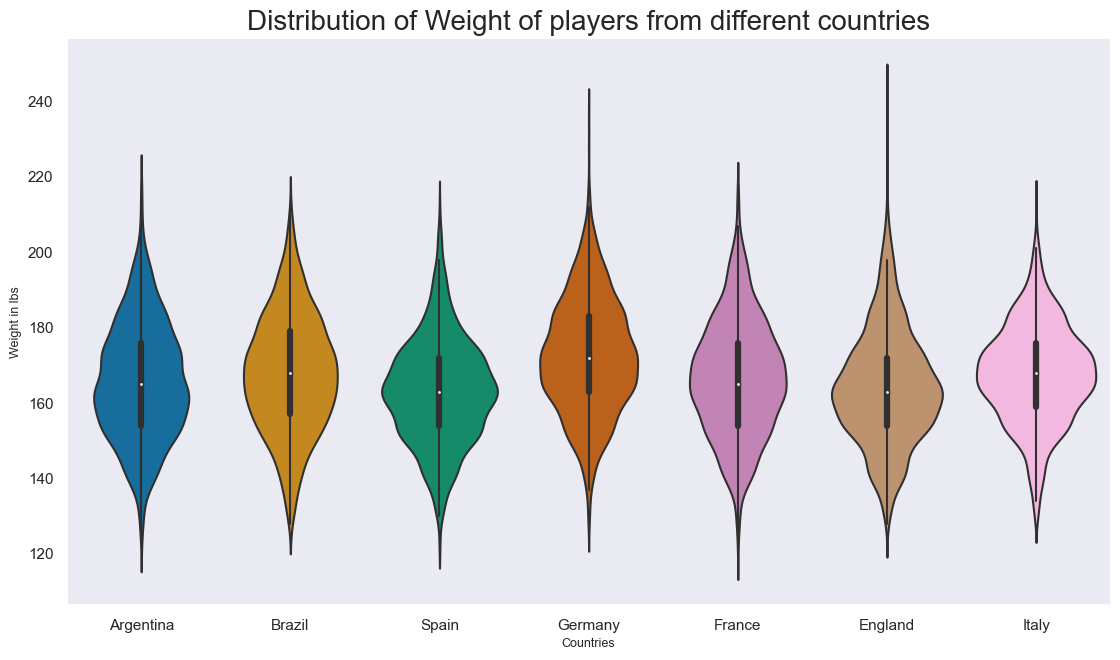

In [83]:
# Every Nations' Player and their Weights

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Weight']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'], palette = 'colorblind')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

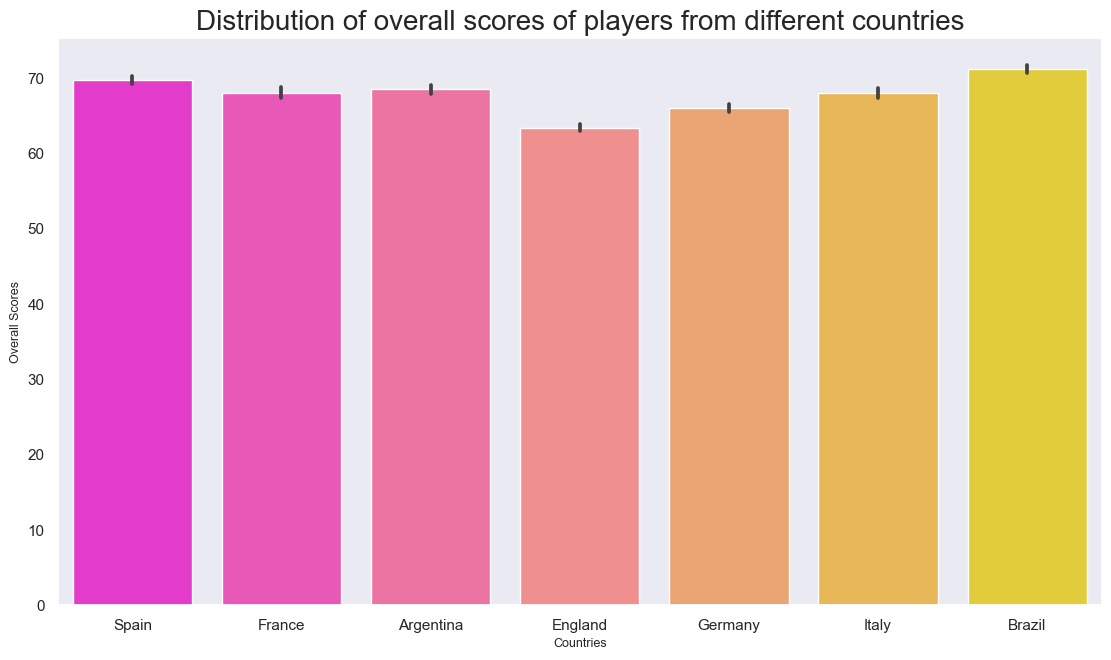

In [84]:
# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

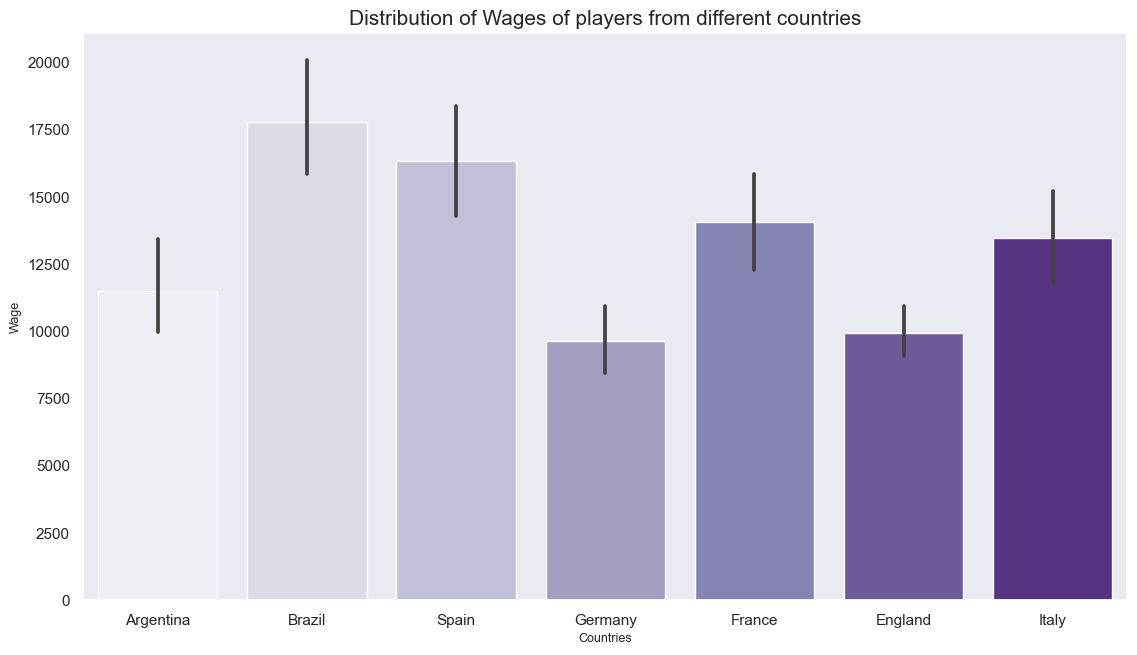

In [85]:
# Every Nations' Player and their wages

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.show()

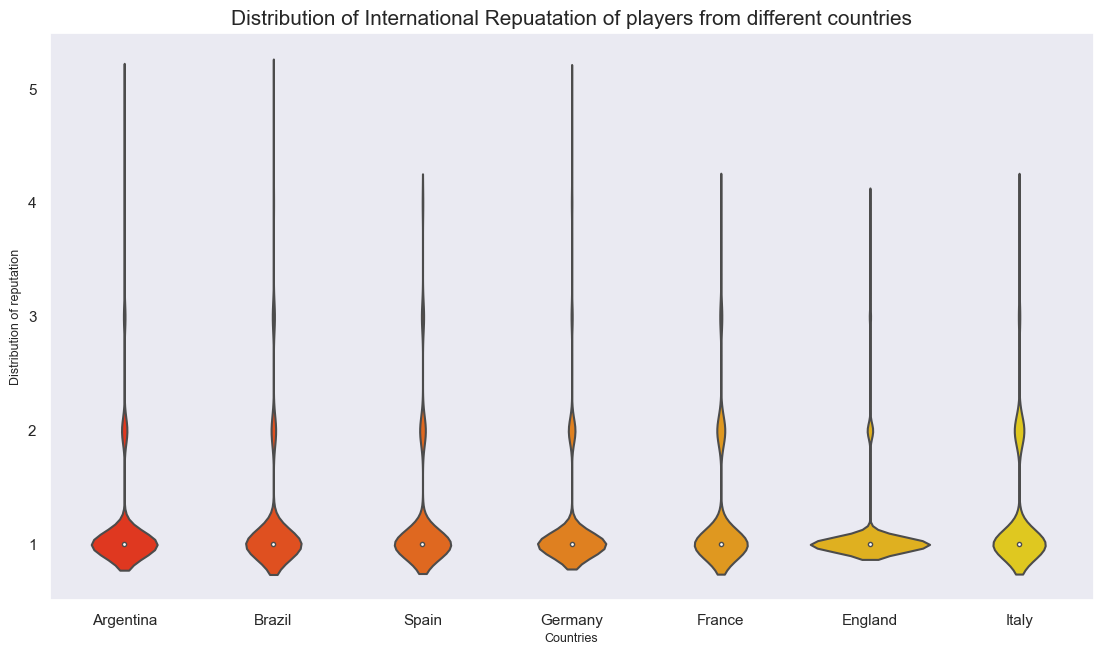

In [86]:
# Every Nations' Player and their International Reputation

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.show()

In [90]:
# finding the the popular clubs around the globe

data['Club'].value_counts().head(10)

No Club                    241
FC Barcelona                33
Burnley                     33
AS Monaco                   33
Everton                     33
TSG 1899 Hoffenheim         33
Wolverhampton Wanderers     33
Eintracht Frankfurt         33
Southampton                 33
Valencia CF                 33
Name: Club, dtype: int64

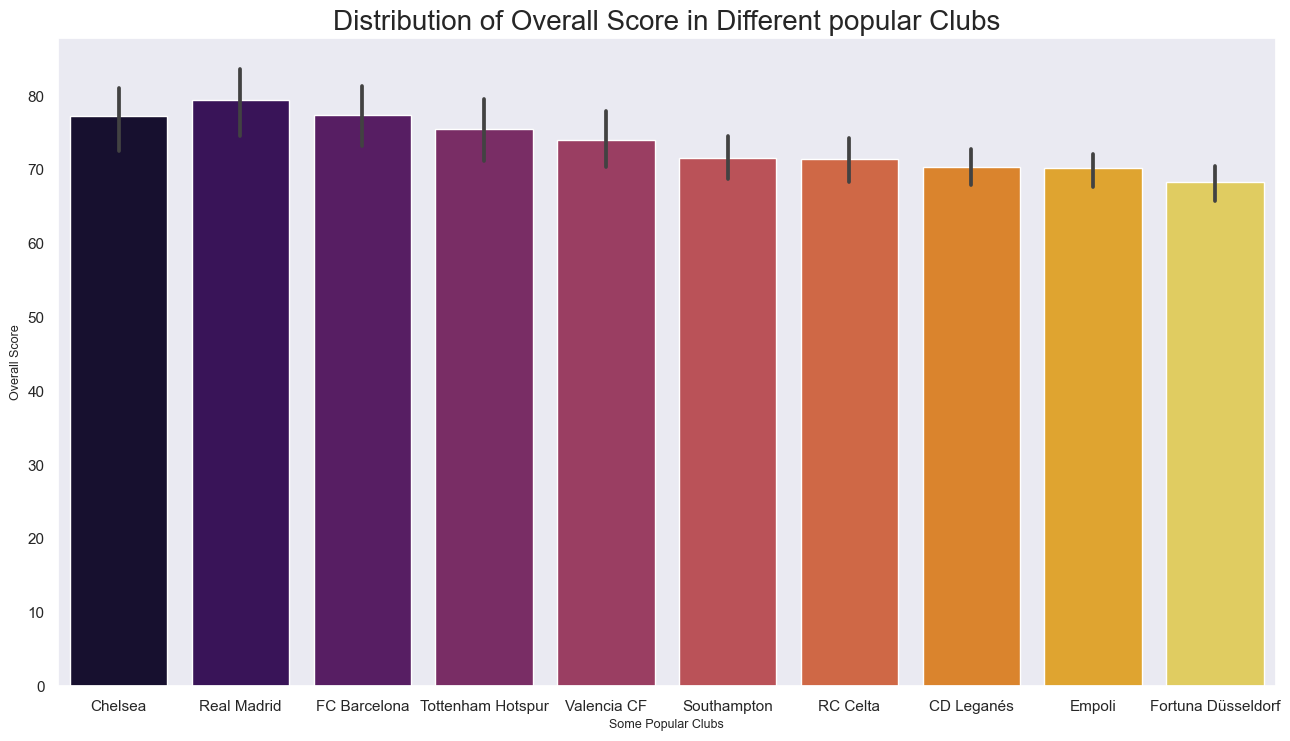

In [89]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.barplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.show()

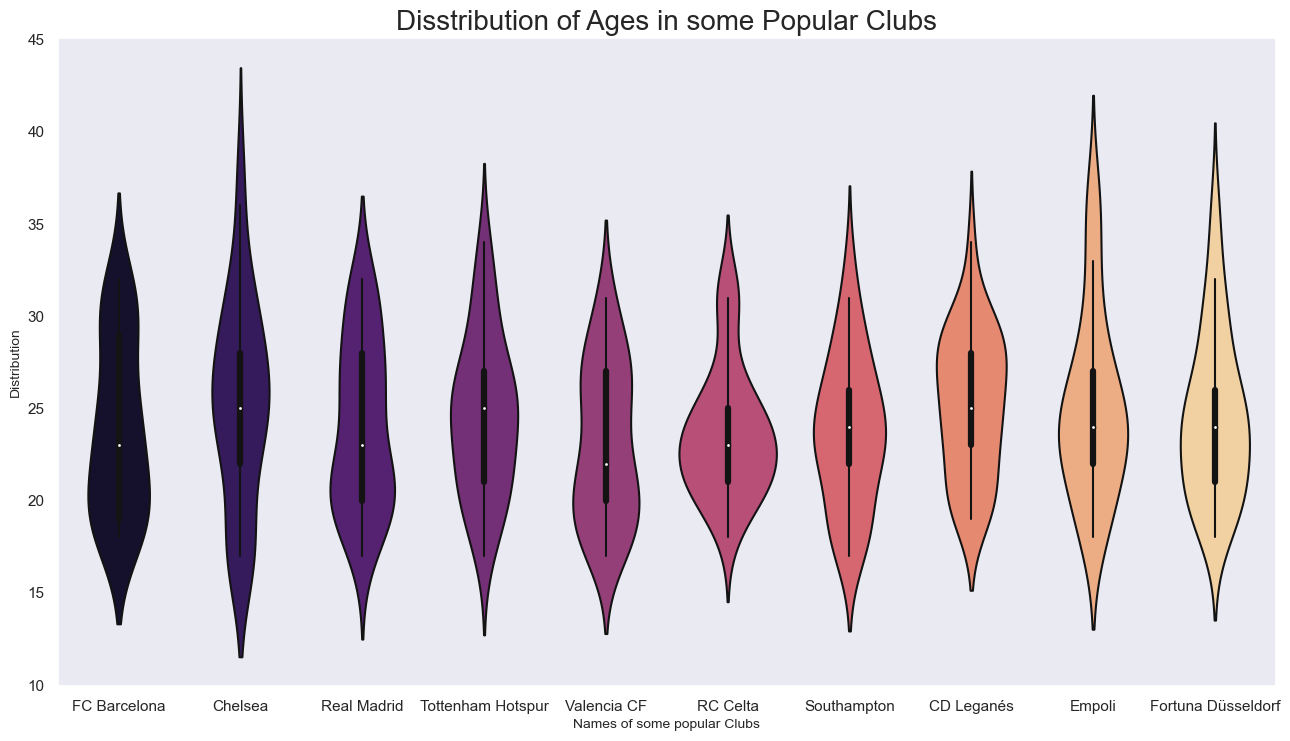

In [91]:
# Distribution of Ages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.violinplot(x = 'Club', y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.show()


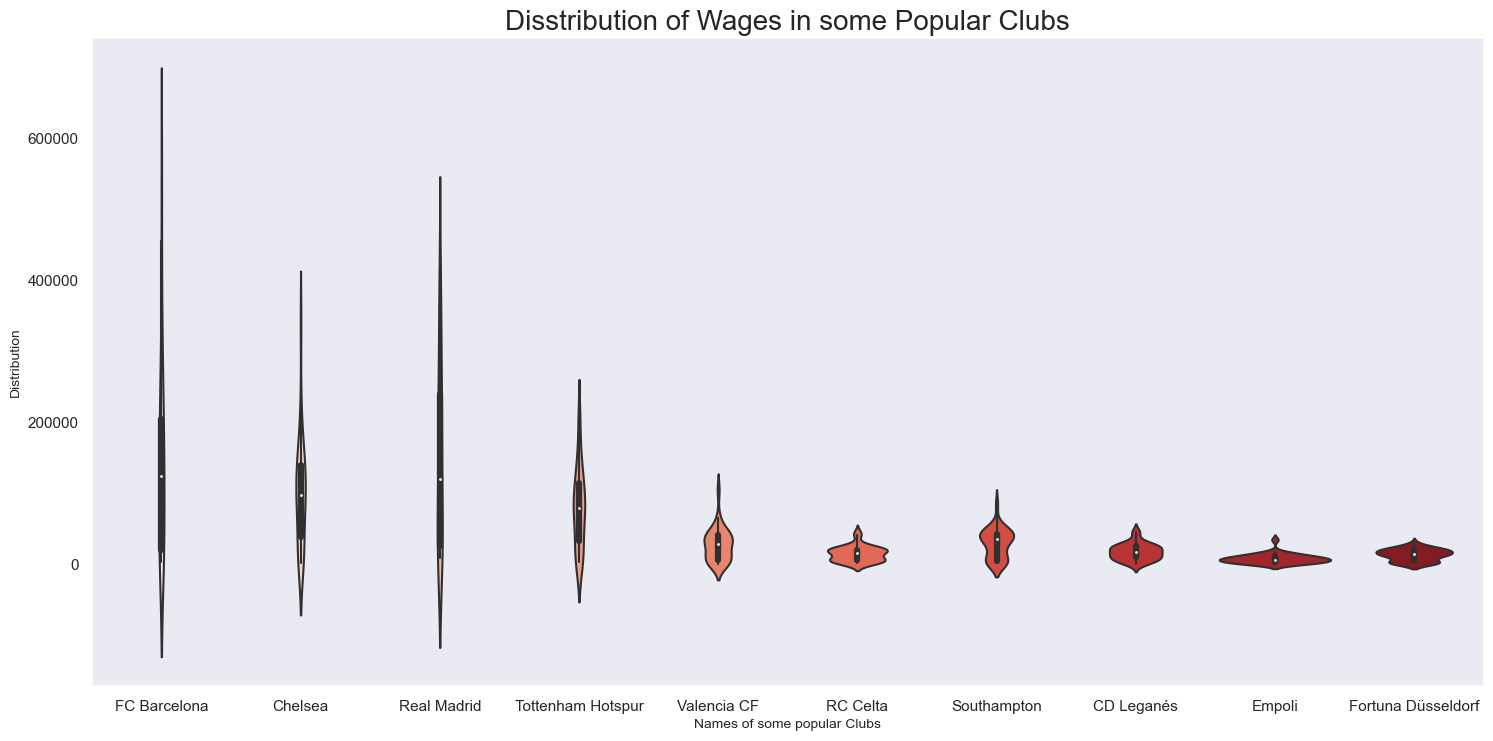

In [92]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.violinplot(x = 'Club', y = 'Wage', data = data_club, palette = 'Reds')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.show()

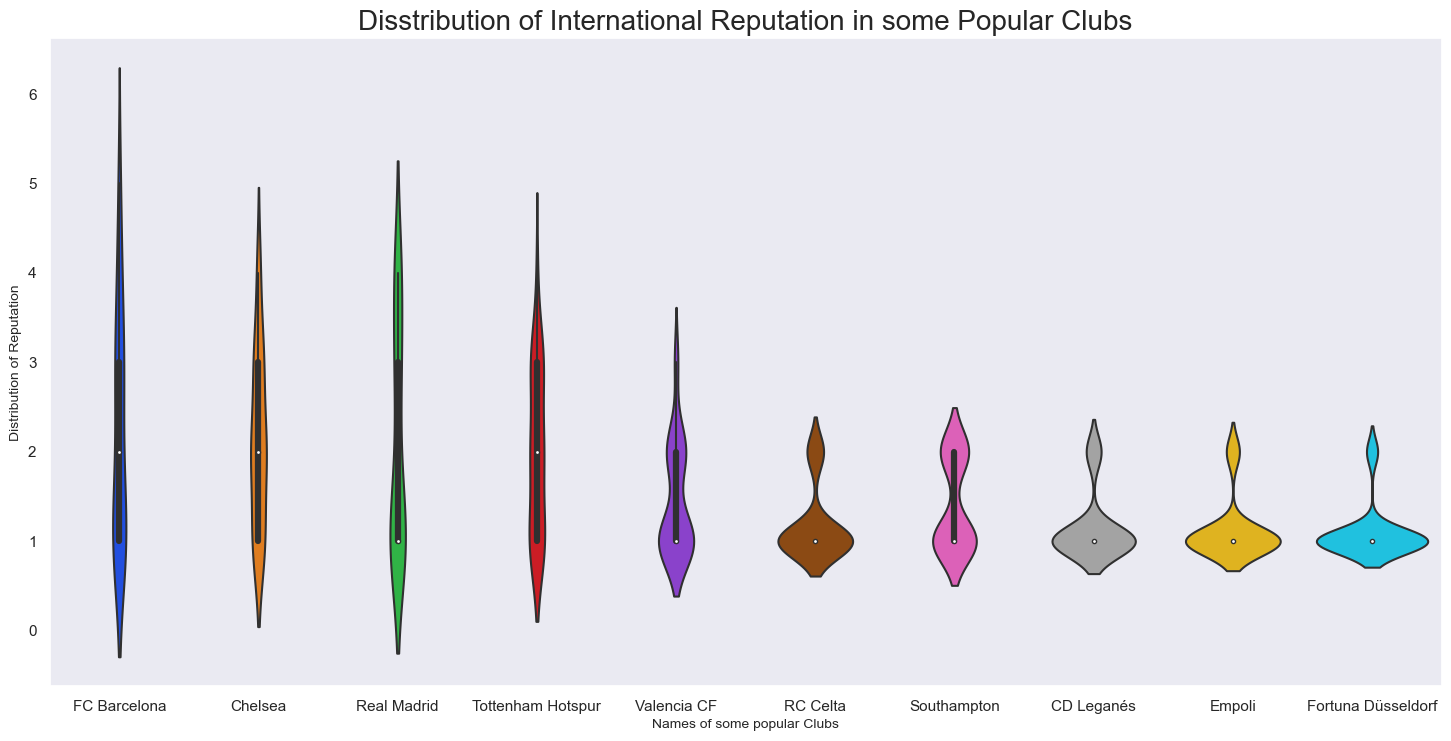

In [93]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.violinplot(x = 'Club', y = 'International Reputation', data = data_club, palette = 'bright')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 10)
ax.set_title(label = 'Disstribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.show()

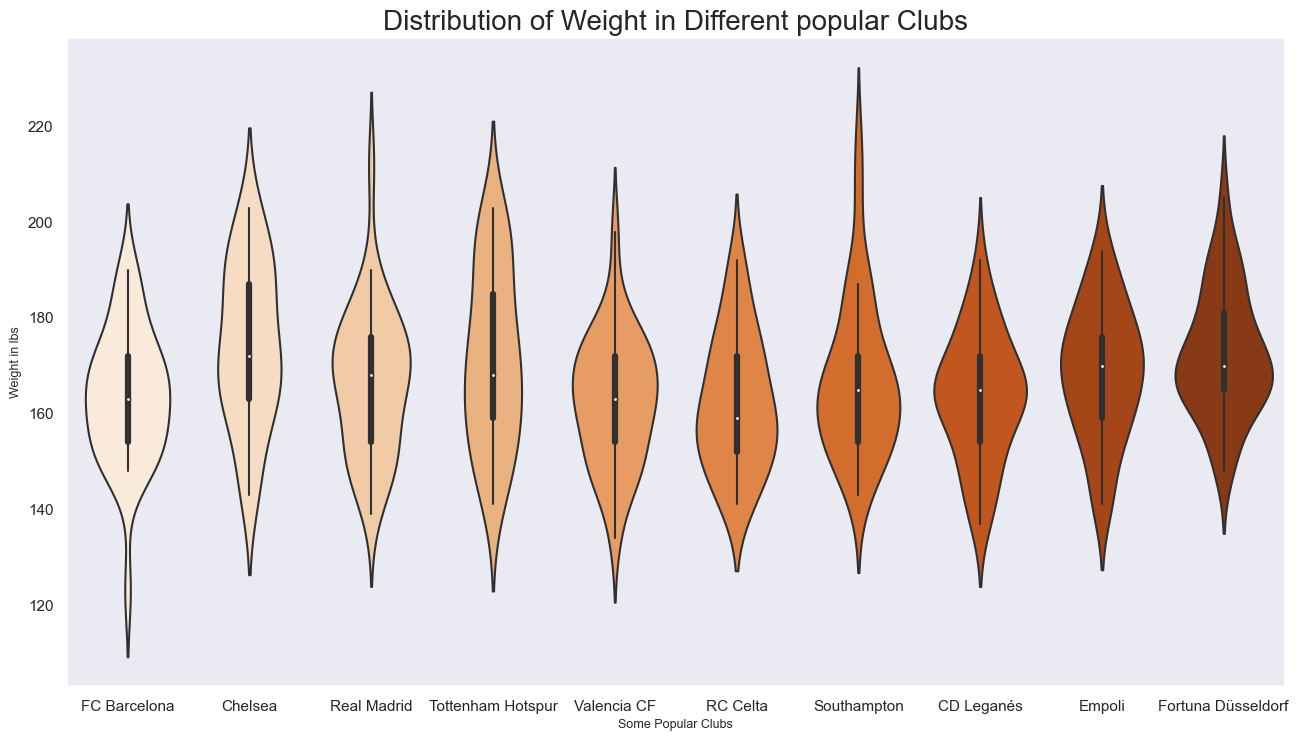

In [94]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Weight']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.violinplot(x = 'Club', y = 'Weight', data = data_clubs, palette = 'Oranges')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight in Different popular Clubs', fontsize = 20)
plt.show()

**15 youngest Players from the FIFA 2019**

In [101]:
# finding 15 youngest Players from the dataset

youngest = data.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(youngest)


                 Name  Age               Club          Nationality
18206       G. Nugent   16    Tranmere Rovers              England
17743       J. Olstad   16    Sarpsborg 08 FF               Norway
13293     H. Massengo   16          AS Monaco               France
16081     J. Italiano   16        Perth Glory            Australia
18166        N. Ayéva   16          Örebro SK               Sweden
17712        K. Broda   16       Wisła Kraków               Poland
17354     L. D'Arrigo   16    Adelaide United            Australia
13567  Y. Verschaeren   16     RSC Anderlecht              Belgium
16927       B. Nygren   16       IFK Göteborg               Sweden
18018     B. O'Gorman   16     Bray Wanderers  Republic of Ireland
17091        A. Doğan   16        Kayserispor               Turkey
17115      C. Bassett   16    Colorado Rapids        United States
15793        J. Lahne   16  IF Brommapojkarna               Sweden
15746     Y. Begraoui   16         AJ Auxerre               Fr

**15 Eldest Players from FIFA 2019**

In [102]:
# finding 15 eldest players from the dataset

eldest = data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(eldest)

                  Name  Age                          Club        Nationality
4741          O. Pérez   45                       Pachuca             Mexico
18183    K. Pilkington   44              Cambridge United            England
17726        T. Warner   44            Accrington Stanley  Trinidad & Tobago
10545      S. Narazaki   42                Nagoya Grampus              Japan
7225          C. Muñoz   41  CD Universidad de Concepción          Argentina
1120         J. Villar   41                       No Club           Paraguay
12192     H. Sulaimani   41                     Ohod Club       Saudi Arabia
15426         M. Tyler   41           Peterborough United            England
4228          B. Nivet   41                  ESTAC Troyes             France
10356         F. Kippe   40                 Lillestrøm SK             Norway
16264  P. van der Vlag   40                      FC Emmen        Netherlands
9484       B. Castillo   40                Atlético Huila           Colombia

In [103]:
# checking the head of the joined column

data['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

**The longest membership in the club**

In [104]:
# The longest membership in the club

import datetime

now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership

Club  Years_of_member
Name                                            
O. Pérez                Pachuca               32
M. Al Shalhoub         Al Hilal               25
H. Sogahata     Kashima Antlers               25
M. Ogasawara    Kashima Antlers               25
S. Narazaki      Nagoya Grampus               24
M. Wölfli        BSC Young Boys               23
K. Kitamoto         Vissel Kobe               23
C. Källqvist          BK Häcken               22
Y. Endo             Gamba Osaka               22
S. Pellissier     Chievo Verona               21

**Defining the features of players**

In [105]:
# defining the features of players

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

C:\Users\Netra\AppData\Local\Temp\ipykernel_8856\3758870228.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():


C:\Users\Netra\AppData\Local\Temp\ipykernel_8856\1876630833.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for position_name, features in data.groupby(data['Position'])[player_features].mean().iterrows():


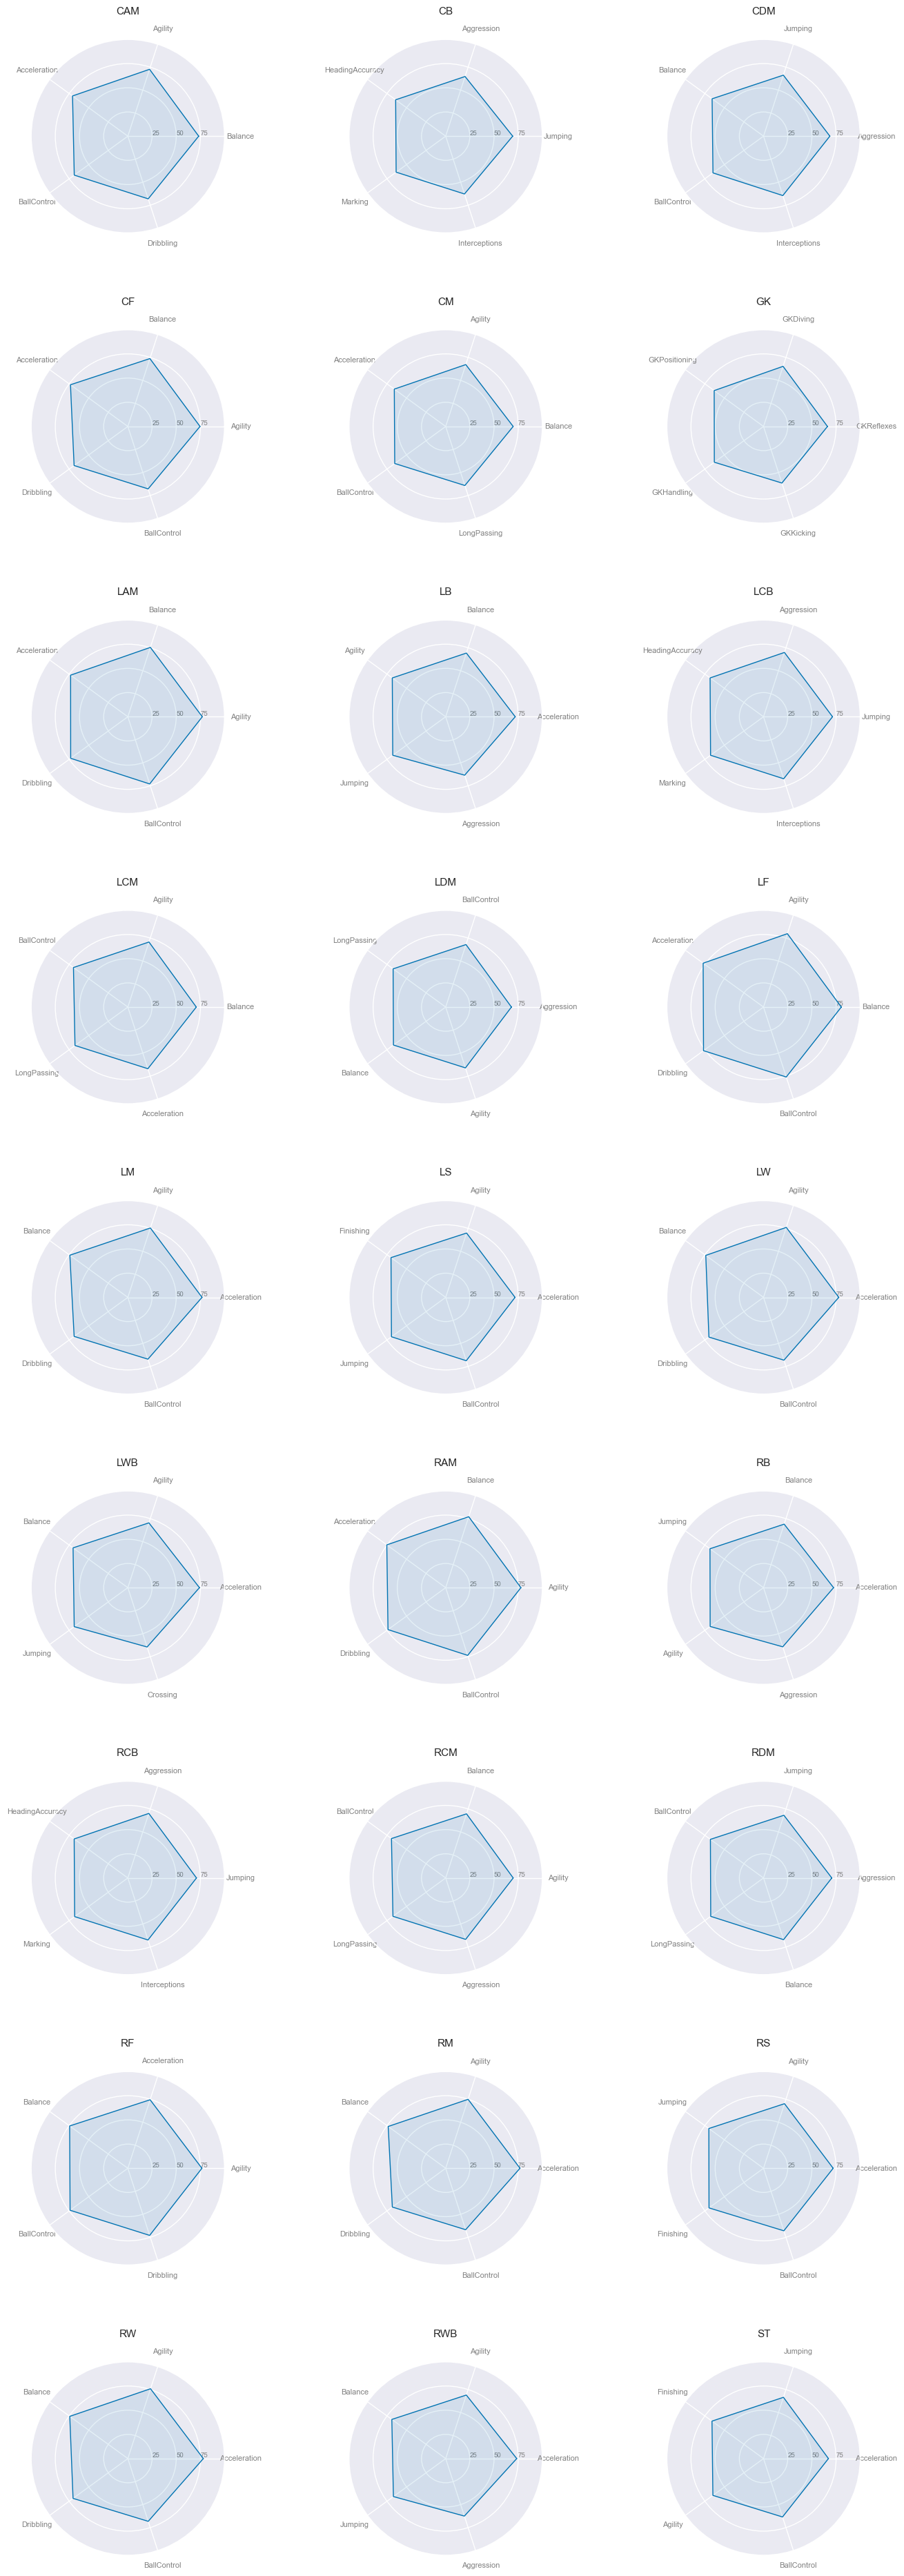

In [100]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in data.groupby(data['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

**Top 10 left footed footballers**

In [106]:
# Top 10 left footed footballers

data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)

Name  Age               Club Nationality
0       L. Messi   31       FC Barcelona   Argentina
13   David Silva   32    Manchester City       Spain
15     P. Dybala   24           Juventus   Argentina
17  A. Griezmann   27    Atlético Madrid      France
19   T. Courtois   26        Real Madrid     Belgium
24  G. Chiellini   33           Juventus       Italy
26      M. Salah   26          Liverpool       Egypt
28  J. Rodríguez   26  FC Bayern München    Colombia
35       Marcelo   30        Real Madrid      Brazil
36       G. Bale   28        Real Madrid       Wales

**Top 10 Right footed footballers**

In [108]:
# Top 10 Right footed footballers

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)

Name  Age                 Club Nationality
1   Cristiano Ronaldo   33             Juventus    Portugal
2           Neymar Jr   26  Paris Saint-Germain      Brazil
3              De Gea   27    Manchester United       Spain
4        K. De Bruyne   27      Manchester City     Belgium
5           E. Hazard   27              Chelsea     Belgium
6           L. Modrić   32          Real Madrid     Croatia
7           L. Suárez   31         FC Barcelona     Uruguay
8        Sergio Ramos   32          Real Madrid       Spain
9            J. Oblak   25      Atlético Madrid    Slovenia
10     R. Lewandowski   29    FC Bayern München      Poland

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


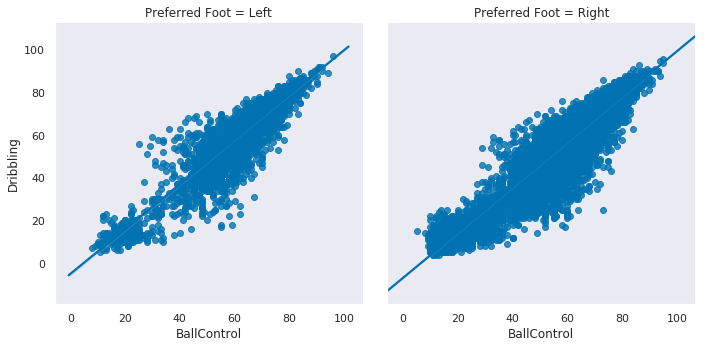

In [ ]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')

**Clubs with highest number of different countries**

In [109]:
# visualizing clubs with highest number of different countries

data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)

Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
West Ham United           18
Empoli                    18
AS Monaco                 18
Eintracht Frankfurt       18
Lazio                     18
Napoli                    18
Name: Nationality, dtype: int64

**Clubs with highest number of different countries**

In [110]:
# visualizing clubs with highest number of different countries

data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = True).head(10)

Club
Santos                       1
Ceará Sporting Club          1
América FC (Minas Gerais)    1
Paraná                       1
Chapecoense                  1
Padova                       1
Cittadella                   1
Sangju Sangmu FC             1
Ranheim Fotball              1
CA Osasuna                   1
Name: Nationality, dtype: int64